# Final
## Merge CBS Amsterdam data with Rental Data
## Then conduct analysis

## Importing basic libraries and reading data files

In [591]:
import numpy as np
import pandas as pd
from datetime import datetime
import random
import seaborn as sns

In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [593]:
#location of the files
fileloc=r'C:/Users/Deniz/Desktop/TezDrive/Thesis/Coding'
#fileloc=r'C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/BaseData'


In [594]:
#read files from excel
RentalData=pd.read_excel(fileloc+'/RentwithBuurtcode.xlsx',na_values='.',header=0)
#df2017=pd.read_excel(fileloc+'/kwb-2017.xls',na_values='.', header=0) #108 column
CBS17=pd.read_excel(fileloc+'/CBS17.xlsx',na_values='.', header=0) #108 column
CBS16=pd.read_excel(fileloc+'/CBS16.xlsx',na_values='.', header=0) #109 column


In [595]:
#checking the shapes of the files
print('Rent Data', RentalData.shape)
print('CBS 2017 Data', CBS17.shape)
print('CBS 2016 Data', CBS16.shape)

Rent Data (2300, 15)
CBS 2017 Data (480, 82)
CBS 2016 Data (479, 105)


In [596]:
RentalData[RentalData.Site=='Paraius'].shape


(1238, 15)

In [597]:
#drop if no data is present in a column
CBS17.dropna(axis=1,how='all',inplace=True)
CBS16.dropna(axis=1,how='all',inplace=True)
print('CBS 2017 Data', CBS17.shape)
print('CBS 2016 Data', CBS16.shape)

CBS 2017 Data (480, 82)
CBS 2016 Data (479, 105)


In [598]:
CBS17.columns

Index(['regioncode', 'regionnumber', 'region indication', 'municipal name',
       'type of region', 'encryption',
       'classification change neighborhoods and neighborhoods',
       'number of inhabitants', 'men', 'women', '0 to 14 years',
       '15 to 24 years', '25 to 44 years', '45 to 64 years',
       '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
       'western total', 'non-western total', 'morocco',
       'netherlands antilles and aruba', 'suriname', 'turkey',
       'other non-western', 'households total', 'single-person households',
       'households without children', 'households with children',
       'average household size', 'population density', 'housing stock',
       'average house value', 'percentage of single-family dwelling',
       'percentage of multi-family dwelling', 'percentage inhabited',
       'percentage uninhabited', 'owned by resident', 'rental housing total',
       'owned housing corporation', 'owned by other landlords',
     

In [599]:
CBS17.head()

,regioncode,regionnumber,region indication,municipal name,type of region,encryption,classification change neighborhoods and neighborhoods,number of inhabitants,men,women,...,dutch total,DistancetoCenter,newCLat,newCLon,realCLat,realCLon,distance to gp practice;,distance to large supermarket,distance to nursery,distance to school
0,BU03630000,3630000.0,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1.0,1020.0,585.0,435.0,...,545.0,927.195085,487673.403538,121841.593669,52.379100,4.901651,0.3,0.2,0.2,0.4
1,BU03630001,3630001.0,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,1.0,660.0,365.0,295.0,...,355.0,533.065675,487437.347218,121559.387250,52.376589,4.897479,0.3,0.3,0.3,0.5
2,BU03630002,3630002.0,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1.0,1580.0,840.0,735.0,...,820.0,569.633710,487327.918090,121735.381187,52.375425,4.900081,0.2,0.2,0.3,0.4
3,BU03630003,3630003.0,Nes e.o.,Amsterdam,Buurt,BU03630003,1.0,360.0,190.0,165.0,...,205.0,142.500767,487112.361034,121391.621151,52.373132,4.894999,0.2,0.4,0.4,0.8
4,BU03630004,3630004.0,BG-terrein e.o.,Amsterdam,Buurt,BU03630004,1.0,615.0,345.0,265.0,...,365.0,284.275565,486964.639962,121517.896422,52.371560,4.896866,0.2,0.4,0.2,0.7


In [600]:
RentalData.columns

Index(['AdName', 'Zipcode', 'Area', 'Description', 'Surface (m²)', 'Bedrooms',
       'Furniture', 'Price (€)', 'Monthly', 'encryption', 'Site', 'Lat', 'Lon',
       'newLat', 'newLon'],
      dtype='object')

In [601]:
#number of rental data scrapped with buurt codes assigned
len(RentalData.encryption) 

2300

In [602]:
#number of unique buurtcodes assigned
len(RentalData.encryption.unique()) #number of unique 

254

In [603]:
#number of rental house add for each neighbourhood
RentalData.groupby(['encryption'])['AdName'].count().describe()

count    253.000000
mean       8.992095
std       12.572644
min        1.000000
25%        3.000000
50%        5.000000
75%       10.000000
max      115.000000
Name: AdName, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


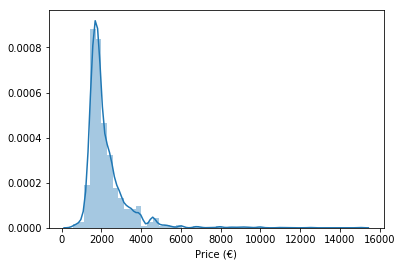

In [604]:
sns.distplot(RentalData['Price (€)']) 

In [605]:
RentalData[RentalData['Price (€)']>10000]

,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,Site,Lat,Lon,newLat,newLon
1202,Bachstraat,1077 GD,Stadsdeel Zuid,"Unieke 12 meter brede Amsterdamse Stadsvilla, ...",380.0,6,unknown,12500,(ex.),BU03634901,Paraius,NaN,NaN,NaN,NaN
1426,Oudezijds Achterburgwal,NaN,Stadsdeel Centrum,FRIENDS CONCEPT POSSIBLE and ENGLISH TEXT BELO...,NaN,9,Unfurnished,11000,NaN,BU03630004,ExpatRental,52.371998,4.897133,487005.783364,121535.989299
2041,Bachstraat,NaN,Stadsdeel Zuid,"Unique 12m wide Amsterdam City villa, consisti...",50.0,4,Unfurnished,15000,NaN,BU03634901,ExpatRental,52.349199,4.879755,484862.729916,120360.493338


## some outliers were found with the rental data so remove them 

In [606]:
RentalData=RentalData[RentalData['Price (€)']<14000]

In [607]:
RentalData=RentalData[RentalData['Price (€)']<14000]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


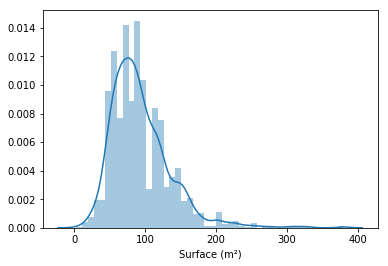

In [608]:
X=RentalData["Surface (m²)"].dropna(how='any')
sns.distplot(X) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


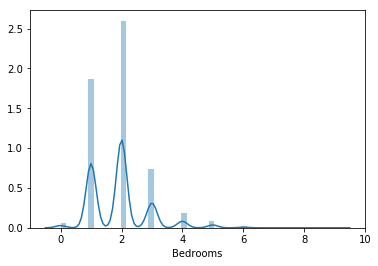

In [609]:
X=RentalData["Bedrooms"].dropna(how='any')
sns.distplot(X) 

In [610]:
RentalData["Price per m²"]=RentalData['Price (€)']/RentalData["Surface (m²)"]
RentalData["Price per number of bedrooms"]=RentalData['Price (€)']/(RentalData["Bedrooms"]+1)

In [611]:
RentalData[RentalData["Price per m²"]>0]["Price per m²"].describe()

count    1565.000000
mean       25.736697
std        16.366744
min         8.139535
25%        20.481928
50%        24.166667
75%        28.666667
max       565.000000
Name: Price per m², dtype: float64

In [612]:
#RentalData[((RentalData["Price per m²"]<90) & (RentalData["Price per m²"]>0))]["Price per m²"].describe()
RentalData["Price per m²"].describe()

count    1565.000000
mean       25.736697
std        16.366744
min         8.139535
25%        20.481928
50%        24.166667
75%        28.666667
max       565.000000
Name: Price per m², dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


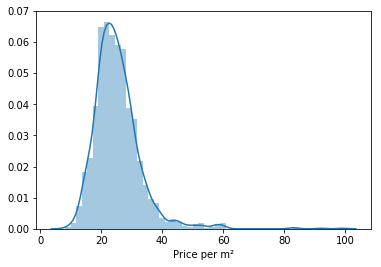

In [613]:
sns.distplot(RentalData[((RentalData["Price per m²"]<120) & (RentalData["Price per m²"]>0))]["Price per m²"]) 

In [614]:
import scipy
scipy.stats.normaltest(RentalData["Price per m²"])

NormaltestResult(statistic=nan, pvalue=nan)

In [615]:
#filter wrongly collected data, 
RentalData=RentalData[((RentalData['Price per m²']<120) & (RentalData['Price per m²']>0))]
RentalData=RentalData[((RentalData['Price per number of bedrooms']<2000) & (RentalData['Price per number of bedrooms']>0))]

In [616]:
RentalData.shape #almost 700 lost

(1552, 17)

In [617]:
RentalData.groupby(['Area'])['encryption'].count()

Area
Stadsdeel Centrum       536
Stadsdeel Nieuw-West     87
Stadsdeel Noord          37
Stadsdeel Oost          118
Stadsdeel West          206
Stadsdeel Westpoort       9
Stadsdeel Zuid          466
Stadsdeel Zuidoost       25
Name: encryption, dtype: int64

## Aggregating Rental Data to neighbourhood codes

In [618]:
Rentgroup=RentalData.groupby(['encryption']).mean()
Rentgroup.reset_index(level=0, inplace=True)
Rentgroup.head()
Rentgroup.shape

(228, 10)

In [619]:
CBS17.shape

(480, 82)

## Merging CBS Data into Rental data

In [620]:
DATA=pd.merge(RentalData,CBS17,  how='left',on='encryption')
DATA.shape

(1552, 98)

In [621]:
DATA

,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,...,dutch total,DistancetoCenter,newCLat,newCLon,realCLat,realCLon,distance to gp practice;,distance to large supermarket,distance to nursery,distance to school
0,Van Tuyll van Serooskerkenplein,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",140.0,3,furnished,2995,(ex.),BU03634801,...,895.0,3424.008737,484645.504035,119398.671911,52.346888,4.865536,0.2,0.2,0.2,0.1
1,Beethovenstraat,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,18.0,1,furnished,900,(incl.),BU03634903,...,870.0,3022.583084,484775.016072,119934.238357,52.348266,4.873453,0.3,0.5,0.2,0.2
2,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
3,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
4,Uiterwaardenstraat,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",85.0,2,furnished or unfurnished,2200,(ex.),BU03635203,...,1595.0,3478.607035,484198.291218,122020.043356,52.342131,4.904289,0.2,0.3,0.1,0.3
5,De Klencke,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,63.0,1,furnished,1800,(ex.),BU03632304,...,510.0,4506.270731,483293.625519,120654.316276,52.332507,4.884099,0.5,0.6,0.1,0.1
6,IJselstraat,1078 CG,Stadsdeel Zuid,Spacious one bedroom apartment divided over 2 ...,75.0,1,furnished,1500,(ex.),BU03632602,...,1155.0,2752.456615,484756.865053,121590.501587,52.348073,4.897939,0.3,0.3,0.3,0.3
7,Admiraal De Ruijterweg,1055 MX,Stadsdeel West,"123makelaar biedt hierbij een prachtig, nieuw ...",48.0,1,unfurnished,1350,(ex.),BU03633704,...,980.0,2570.560615,487796.539905,118857.416369,52.380410,4.857534,0.2,0.5,0.2,0.5
8,Rooseveltlaan,1078 NW,Stadsdeel Zuid,Beautiful fully renovated 3-room apartment on ...,95.0,2,unfurnished,2100,(ex.),BU03635202,...,2310.0,3410.689765,484204.847957,121669.014097,52.342201,4.899100,0.2,0.3,0.2,0.4
9,Keizersgracht,1016 EK,Stadsdeel Centrum,"Keizersgracht 405-III+IV, 1016 EK Amsterdam Un...",208.0,3,furnished,7950,(ex.),BU03630303,...,965.0,1017.846536,486311.131169,121747.357608,52.364608,4.900258,0.3,0.3,0.2,0.5


## Preparing numerical values for missing data handling

In [622]:
DATA.columns.to_series().groupby(DATA.dtypes).groups

{dtype('int64'): Index(['Bedrooms', 'Price (€)'], dtype='object'),
 dtype('float64'): Index(['Surface (m²)', 'Lat', 'Lon', 'newLat', 'newLon', 'Price per m²',
        'Price per number of bedrooms', 'regionnumber',
        'classification change neighborhoods and neighborhoods',
        'number of inhabitants', 'men', 'women', '0 to 14 years',
        '15 to 24 years', '25 to 44 years', '45 to 64 years',
        '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
        'western total', 'non-western total', 'morocco',
        'netherlands antilles and aruba', 'suriname', 'turkey',
        'other non-western', 'households total', 'single-person households',
        'households without children', 'households with children',
        'average household size', 'population density', 'housing stock',
        'average house value', 'percentage of single-family dwelling',
        'percentage of multi-family dwelling', 'percentage inhabited',
        'percentage uninhabited', 'o

In [623]:
floatcolumns=['Surface (m²)', 'Lat', 'Lon', 'newLat', 'newLon', 'Price per m²',
        'Price per number of bedrooms', 'regionnumber',
        'classification change neighborhoods and neighborhoods',
        'number of inhabitants', 'men', 'women', '0 to 14 years',
        '15 to 24 years', '25 to 44 years', '45 to 64 years',
        '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
        'western total', 'non-western total', 'morocco',
        'netherlands antilles and aruba', 'suriname', 'turkey',
        'other non-western', 'households total', 'single-person households',
        'households without children', 'households with children',
        'average household size', 'population density', 'housing stock',
        'average house value', 'percentage of single-family dwelling',
        'percentage of multi-family dwelling', 'percentage inhabited',
        'percentage uninhabited', 'owned by resident', 'rental housing total',
        'owned housing corporation', 'owned by other landlords',
        'property unknown', 'year of construction before 2000',
        'year of construction after 2000',
        'persons per type of benefit; assistance',
        'persons by type of benefit; ao', 'persons by type of benefit; ww',
        'persons by type of benefit; aow', 'total business locations',
        'a agriculture forestry and fishing', 'b-f industry and energy',
        'g + i trade and catering',
        'h + j transport information and communication',
        'k-l financial services real estate', 'm-n business services',
        'r-u culture recreation other services', 'passenger cars total',
        'passenger cars; younger than 6 years',
        'passenger cars; 6 years and older', 'passenger cars; fuel gasoline',
        'passenger cars; other fuel', 'passenger cars per household',
        'passenger cars by surface', 'motorcycles', 'total area', 'land area',
        'surface water', 'most common zip code', 'coverage percentage',
        'degree of urbanity', 'environmental address density', 'dutch total',
        'DistancetoCenter', 'newCLat', 'newCLon', 'realCLat', 'realCLon',
        'distance to gp practice;', 'distance to large supermarket',
        'distance to nursery', 'distance to school']#bedrooms removed
intcolumns=['Bedrooms', 'Price (€)']
stringcolumns=['AdName', 'Zipcode', 'Area', 'Description', 'Furniture', 'Monthly',
        'encryption', 'Site', 'regioncode', 'region indication',
        'municipal name', 'type of region']

In [624]:
len(floatcolumns+intcolumns+stringcolumns)

98

In [625]:
flnintcolumns=floatcolumns
flnintcolumns

['Surface (m²)',
 'Lat',
 'Lon',
 'newLat',
 'newLon',
 'Price per m²',
 'Price per number of bedrooms',
 'regionnumber',
 'classification change neighborhoods and neighborhoods',
 'number of inhabitants',
 'men',
 'women',
 '0 to 14 years',
 '15 to 24 years',
 '25 to 44 years',
 '45 to 64 years',
 '65 years or older',
 'unmarried',
 'married',
 'divorced',
 'widowed',
 'western total',
 'non-western total',
 'morocco',
 'netherlands antilles and aruba',
 'suriname',
 'turkey',
 'other non-western',
 'households total',
 'single-person households',
 'households without children',
 'households with children',
 'average household size',
 'population density',
 'housing stock',
 'average house value',
 'percentage of single-family dwelling',
 'percentage of multi-family dwelling',
 'percentage inhabited',
 'percentage uninhabited',
 'owned by resident',
 'rental housing total',
 'owned housing corporation',
 'owned by other landlords',
 'property unknown',
 'year of construction before 20

In [626]:
datacol = DATA.columns.tolist()
datain= DATA.index.tolist()

In [1279]:
columnstodrop=['regionnumber','type of region','classification change neighborhoods and neighborhoods','regioncode']
data=DATA.drop(columnstodrop,axis=1)
    

In [1280]:
len(DATA[DATA.Area=='Stadsdeel Centrum']['region indication'].unique())

45

In [1281]:
len(DATA.groupby(['region indication'])['regioncode'].count())
#DATA.groupby('region indication')

227

In [1282]:
data=data[['Price (€)','Area','encryption','DistancetoCenter','region indication','Surface (m²)','Bedrooms']]

print(data.shape,DATA.shape)

(1552, 7) (1552, 98)


In [1070]:
data.columns

Index(['Price (€)', 'Area', 'encryption', 'DistancetoCenter',
       'region indication', 'Surface (m²)', 'Bedrooms'],
      dtype='object')

In [1285]:
data=data[data.Area!='Stadsdeel Westpoort']
data.shape#messedup data

(1475, 8)

In [1152]:
len(data.Area)

1543

# Bayesial Hierarchical Model

In [1072]:
import pymc3 as pm
import pandas as pd
import theano
import math

In [1286]:
data['Price (€)'] = data['Price (€)'].astype(theano.config.floatX)
data.dropna(subset = ['encryption'],inplace=True)
data.dropna(subset = ['Area'],inplace=True)
data.dropna(subset = ['DistancetoCenter'],inplace=True)
data.dropna(subset = ['Surface (m²)'],inplace=True)
data['Area'] = data['Area'].astype('category')

data['Area_idx'] = data['Area'].cat.codes

data.shape


(1475, 8)

In [1287]:
data[['Surface (m²)','DistancetoCenter','Bedrooms','Price (€)']].isnull().values.any()

False

In [1288]:
data.head()

,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Area_idx
0,2995.0,Stadsdeel Zuid,BU03634801,3424.008737,Marathonbuurt Oost,140.0,3,6
1,900.0,Stadsdeel Zuid,BU03634903,3022.583084,Minervabuurt Noord,18.0,1,6
2,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1
3,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1
4,2200.0,Stadsdeel Zuid,BU03635203,3478.607035,Scheldebuurt Oost,85.0,2,6


In [1289]:
Area_codes = data.Area.unique()
#county_idx = data.county_code.values

n_area = len(Area_codes)

area_idx=data['Area'].values
area_idx

data['Log_Price']=data["Price (€)"].apply(lambda x:math.log(x))


In [1290]:
data['Log_Price'].describe()

count    1475.000000
mean        7.627855
std         0.334746
min         6.309918
25%         7.408531
50%         7.549609
75%         7.824046
max         9.433484
Name: Log_Price, dtype: float64

In [1291]:
data["Price (€)"].describe()
#https://docs.pymc.io/api/distributions/continuous.html

count     1475.000000
mean      2188.274576
std        930.087708
min        550.000000
25%       1650.000000
50%       1900.000000
75%       2500.000000
max      12500.000000
Name: Price (€), dtype: float64

In [1292]:
data["DistancetoCenter"].describe()


count     1475.000000
mean      2406.610888
std       1917.826534
min         51.421751
25%       1017.846536
50%       1836.353338
75%       3273.027835
max      10457.809197
Name: DistancetoCenter, dtype: float64

In [1293]:
data.Bedrooms.describe()

count    1475.000000
mean        1.931525
std         0.926060
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: Bedrooms, dtype: float64

In [1294]:
data['Surface (m²)'].describe()

count    1475.000000
mean       92.570847
std        41.314061
min        12.000000
25%        65.000000
50%        85.000000
75%       111.000000
max       380.000000
Name: Surface (m²), dtype: float64

### Normalizing by means and standard deviations

In [1299]:
datasave.head()

,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Area_idx,Log_Price
0,2995.0,Stadsdeel Zuid,BU03634801,3424.008737,Marathonbuurt Oost,140.0,3,6,8.004700
1,900.0,Stadsdeel Zuid,BU03634903,3022.583084,Minervabuurt Noord,18.0,1,6,6.802395
2,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1,7.549609
3,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1,7.549609
4,2200.0,Stadsdeel Zuid,BU03635203,3478.607035,Scheldebuurt Oost,85.0,2,6,7.696213


In [1298]:
data['Log_Price']=(data['Log_Price']-logmean)/logdev
data["Price (€)"]=(data["Price (€)"]-pricemean)/(Pricedeviation)
data["DistancetoCenter"]=(data["DistancetoCenter"]-distancemean)/(Distancedeviation)
data["Bedrooms"]=(data["Bedrooms"]-bedroommean)/(Bedroomdeviation)
data["Surface (m²)"]=(data["Surface (m²)"]-surfacemean)/(Surfacedeviation)

In [1300]:
data.head()


,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Area_idx,Log_Price
0,0.858717,Stadsdeel Zuid,BU03634801,0.531435,Marathonbuurt Oost,1.139657,1.147001,6,1.114684
1,-1.387257,Stadsdeel Zuid,BU03634903,0.321492,Minervabuurt Noord,-1.805722,-1.007619,6,-2.462880
2,-0.315193,Stadsdeel Nieuw-West,BU03638701,0.693331,Andreasterrein,-0.188178,0.069691,1,-0.239478
3,-0.315193,Stadsdeel Nieuw-West,BU03638701,0.693331,Andreasterrein,-0.188178,0.069691,1,-0.239478
4,0.006426,Stadsdeel Zuid,BU03635203,0.559990,Scheldebuurt Oost,-0.188178,0.069691,6,0.196754


In [1275]:
data.describe()

,index,Price (€),DistancetoCenter,Surface (m²),Bedrooms,Log_Price
count,1475.000000,1475.000000,1475.000000,1.475000e+03,1475.000000,1475.000000
mean,759.622373,-0.006145,-0.000658,-1.647646e-16,-0.004077,-0.006649
std,439.511688,0.997113,1.003013,9.974225e-01,0.997654,0.996067
min,0.000000,-1.762479,-1.232409,-1.945177e+00,-2.084929,-3.928287
25%,382.500000,-0.583209,-0.726974,-6.656277e-01,-1.007619,-0.659270
50%,756.000000,-0.315193,-0.298900,-1.827788e-01,0.069691,-0.239478
75%,1130.500000,0.328045,0.452473,4.449248e-01,0.069691,0.577133
max,1542.000000,11.048682,4.210074,6.939243e+00,4.378931,5.366158


In [1086]:
data.groupby(['Area_idx'])['Bedrooms'].count()  #they match no data lost since encryption

Area_idx
0    536
1     87
2     37
3    118
4    206
5    466
6     25
Name: Bedrooms, dtype: int64

In [1087]:
data.groupby(['Area'])['encryption'].count()

Area
Stadsdeel Centrum       536
Stadsdeel Nieuw-West     87
Stadsdeel Noord          37
Stadsdeel Oost          118
Stadsdeel West          206
Stadsdeel Zuid          466
Stadsdeel Zuidoost       25
Name: encryption, dtype: int64

In [1088]:
set(data.Area_idx)

{0, 1, 2, 3, 4, 5, 6}

# Hiearchcial Bayesian Model Specification

### with 4 vector in model equation

In [1089]:
# Hiearchcial Bayesian Model with 4 vector
with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu_b0 = pm.Normal('mu_beta0',0 , 2)
    sigma_b0 = pm.Gamma('sd_beta0', 0.1, 0.1)
    
    
    # Intercept for each, distributed around group mean mu_a
    b0 = pm.Normal('beta_0', mu=mu_b0, sd=sigma_b0, shape=n_area)
        
    
    # Intercept for each, distributed around group mean mu_a
    b1 = pm.Normal('b_size', 0, 2, shape=n_area)
    b2 = pm.Normal('b_bedroom',0, 2, shape=n_area)
    b3 = pm.Normal('b_distance',0, 2, shape=n_area)
    
    
    # Model error
    eps = pm.Gamma('eps', 0.1, 0.1)
    
    # Expected value
    price_est = (b0[data.Area_idx] + b1[data.Area_idx]*data['Surface (m²)'].values+ 
                 b2[data.Area_idx]*(data['Bedrooms'].values)+ b3[data.Area_idx]*data['DistancetoCenter'].values)
    
    # Data likelihood
    price_like = pm.Normal('pricelike', mu=price_est, sd=eps, observed=data['Log_Price'])


C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [1090]:
with hierarchical_model:
    hierarchical_traceS = pm.sample(1000, njobs=1, step=pm.NUTS())

Sequential sampling (2 chains in 1 job)
NUTS: [eps_log__, b_distance, b_bedroom, b_size, beta_0, sd_beta0_log__, mu_beta0]
  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [3:48:48<00:00,  9.15s/it]


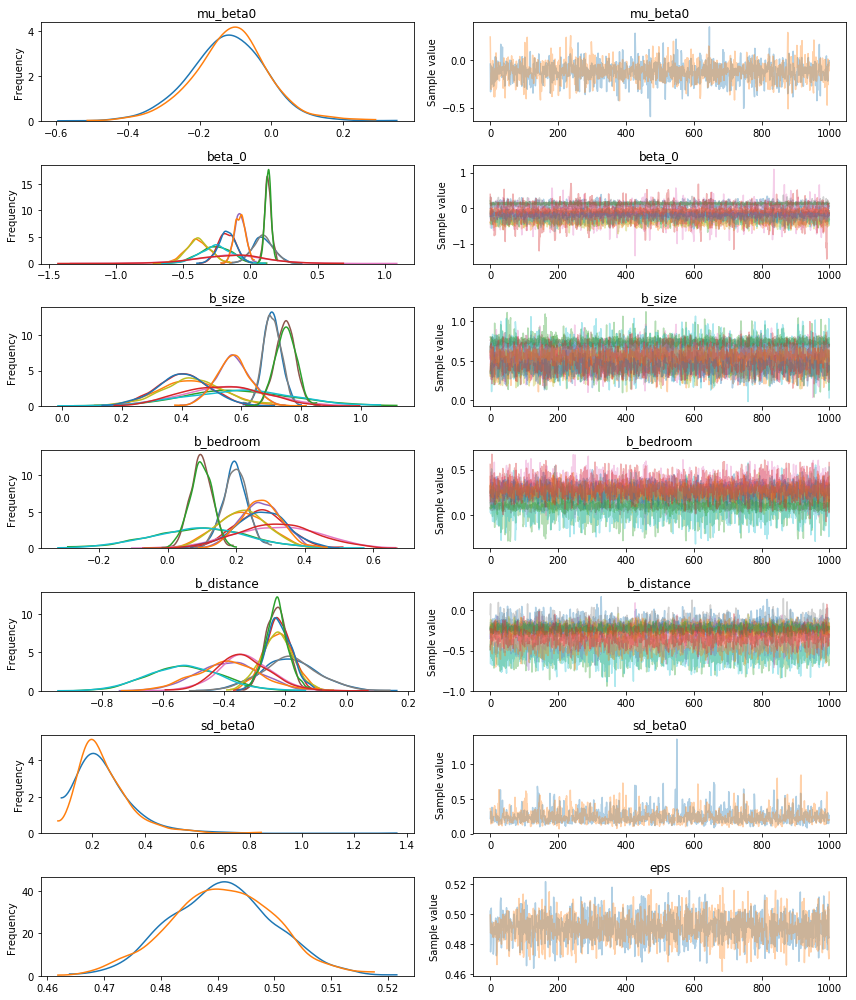

In [1091]:
pm.traceplot(hierarchical_traceS);

In [1092]:
pm.summary(hierarchical_traceS).round(2)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu_beta0,-0.12,0.11,0.00,-0.34,0.08,1939.13,1.0
beta_0__0,0.09,0.08,0.00,-0.05,0.25,1676.81,1.0
beta_0__1,-0.39,0.09,0.00,-0.57,-0.22,1665.20,1.0
beta_0__2,-0.26,0.12,0.00,-0.48,-0.03,1853.38,1.0
beta_0__3,-0.17,0.06,0.00,-0.31,-0.06,1921.81,1.0
beta_0__4,-0.08,0.04,0.00,-0.15,-0.00,2266.00,1.0
beta_0__5,0.13,0.02,0.00,0.09,0.18,3362.92,1.0
beta_0__6,-0.16,0.26,0.01,-0.73,0.31,1127.06,1.0
b_size__0,0.70,0.03,0.00,0.65,0.76,1904.98,1.0
b_size__1,0.43,0.11,0.00,0.23,0.65,1826.56,1.0


## LESS HIERARCHY with 1 vector


In [997]:
with pm.Model() as hierarchical_model1:
    # Hyperpriors
    mu_b0 = pm.Normal('mu_beta0',0 , 2)
    sigma_b0 = pm.Gamma('sd_beta0', 0.1, 0.1)
    
    
    # Intercept for each, distributed around group mean mu_a
    b0 = pm.Normal('beta_0', mu=mu_b0, sd=sigma_b0, shape=n_area)
        
    
    # Intercept for each, distributed around group mean mu_a
    b1 = pm.Normal('b_size', 0, 2)
    b2 = pm.Normal('b_bedroom',0, 2)
    b3 = pm.Normal('b_distance',0, 2)
    
    
    # Model error
    eps = pm.Gamma('error',  0.1, 0.1)
    
    # Expected value
    price_est = (b0[data.Area_idx] + b1*data['Surface (m²)'].values+ 
                 b2*(data['Bedrooms'].values)+ b3*data['DistancetoCenter'].values)
    
    # Data likelihood
    price_like = pm.Normal('pricelike', mu=price_est, sd=eps, observed=data['Log_Price'])

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [185]:
with hierarchical_model1:
    hierarchical_traceb0 = pm.sample(1000, njobs=1, step=pm.NUTS())

Sequential sampling (2 chains in 1 job)
NUTS: [error_log__, b_distance, b_bedroom, b_size, beta_0, sd_beta0_log__, mu_beta0]
  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [59:50<00:00,  2.39s/it]


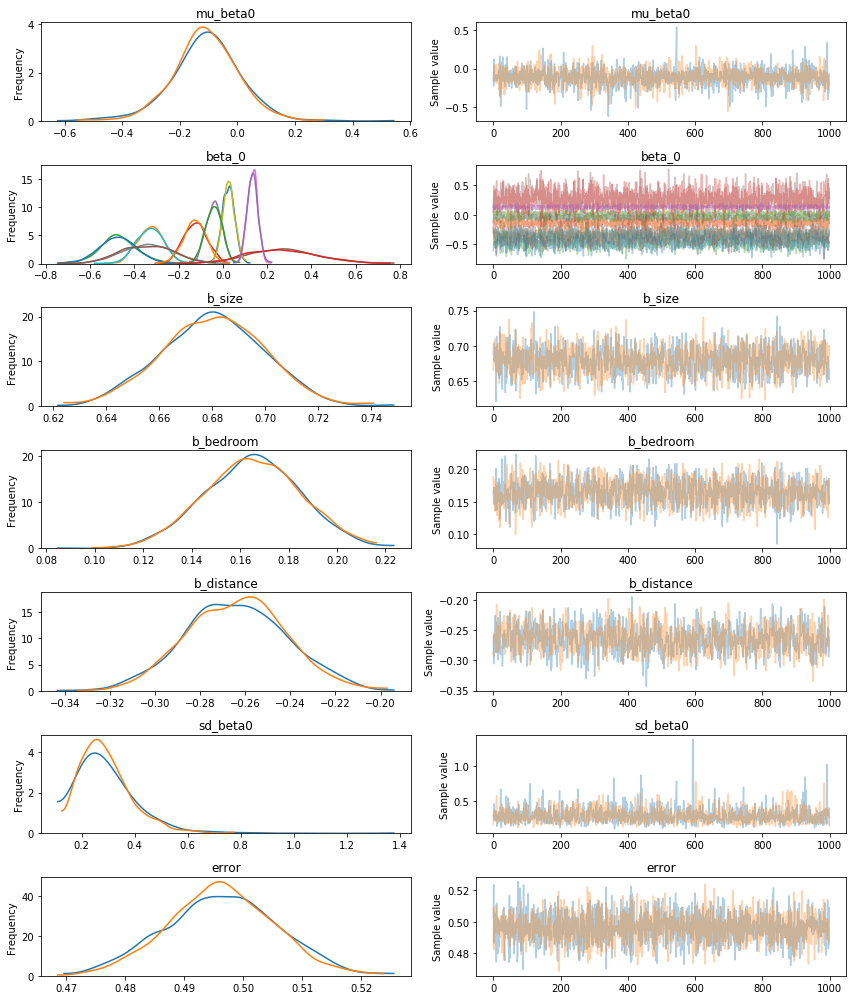

In [1007]:
pm.traceplot(hierarchical_traceb0);

In [202]:
pm.summary(hierarchical_traceb0).round(2)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu_beta0,-0.11,0.11,0.0,-0.34,0.11,2009.86,1.0
beta_0__0,0.03,0.03,0.0,-0.03,0.08,1454.71,1.0
beta_0__1,-0.33,0.06,0.0,-0.44,-0.22,1807.65,1.0
beta_0__2,-0.47,0.08,0.0,-0.64,-0.31,2049.12,1.0
beta_0__3,-0.13,0.05,0.0,-0.23,-0.03,1771.29,1.0
beta_0__4,-0.04,0.04,0.0,-0.11,0.03,2795.47,1.0
beta_0__5,0.27,0.16,0.0,-0.03,0.58,2490.28,1.0
beta_0__6,0.13,0.02,0.0,0.09,0.18,3108.04,1.0
beta_0__7,-0.34,0.11,0.0,-0.56,-0.12,1446.28,1.0
b_size,0.68,0.02,0.0,0.64,0.72,1595.09,1.0


## model equation with distance as minus

In [ ]:
#with burn-in steps

# Posterior Predictive Check

In [276]:
#posterior predictive results as priors
with pm.Model() as hierarchical_model_ppc:
    #mu_b0 = pm.Normal('mu_beta0',-0.09 , 0.11)
    #sigma_b0 = pm.Gamma('sd_beta0', 0.1, 0.1)
    
    
    # Intercept for each, distributed around group mean mu_a
    b0 = pm.Normal('beta_0', 0.09,0.12, shape=n_area)
        
    
    # Intercept for each, distributed around group mean mu_a
    b1 = pm.Normal('b_size', 0.68, 0.02)
    b2 = pm.Normal('b_bedroom',0.16, 0.02)
    b3 = pm.Normal('b_distance',-0.26, 0.02)
    
    # Expected value
    price_est = (b0[data.Area_idx] + b1*data['Surface (m²)'].values+b2*(data['Bedrooms'].values)+ b3*data['DistancetoCenter'].values)
    
    # Model error
    eps = pm.Normal('error',  0.49, 0.01)
        
    outcome = pm.Normal('pricelike', mu=price_est, sd=eps, observed=data['Log_Price'])
    
    #trace = pm.sample(5000)
    

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [1016]:
posterior_predictive_checkstry1 = pm.sample_ppc(hierarchical_traceb0, model= hierarchical_model_ppc, samples=1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.45it/s]


In [1024]:
posterior_predictive_checkstry2 = pm.sample_ppc(hierarchical_traceb0, model= hierarchical_model1, samples=1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.73it/s]


In [1025]:
ppc1=posterior_predictive_checkstry1
ppc2=posterior_predictive_checkstry2

In [1028]:
ppc1

{'pricelike': array([[ 0.88099999, -0.26003298, -0.90257319, ..., -1.17556935,
          0.94488323,  0.9743981 ],
        [ 1.51157385, -2.01905396,  0.11534919, ..., -1.47923233,
          0.59376568, -0.46755172],
        [ 0.84101708, -0.40828441, -1.0310379 , ..., -0.27141387,
          1.08653634, -0.02116994],
        ...,
        [ 1.6863172 , -2.10062885,  0.16221656, ..., -1.34289678,
          1.69433062,  0.96436889],
        [ 0.95294436, -0.88591787, -1.25699514, ..., -1.23417609,
          0.76056005,  0.79068437],
        [ 1.29183645, -0.45745692, -0.82032677, ..., -1.11375885,
          0.23532277, -0.54487086]])}

In [1018]:
ppc1['pricelike'].shape

(1000, 1484)

In [1019]:
ppc1['pricelike']

array([[ 0.88099999, -0.26003298, -0.90257319, ..., -1.17556935,
         0.94488323,  0.9743981 ],
       [ 1.51157385, -2.01905396,  0.11534919, ..., -1.47923233,
         0.59376568, -0.46755172],
       [ 0.84101708, -0.40828441, -1.0310379 , ..., -0.27141387,
         1.08653634, -0.02116994],
       ...,
       [ 1.6863172 , -2.10062885,  0.16221656, ..., -1.34289678,
         1.69433062,  0.96436889],
       [ 0.95294436, -0.88591787, -1.25699514, ..., -1.23417609,
         0.76056005,  0.79068437],
       [ 1.29183645, -0.45745692, -0.82032677, ..., -1.11375885,
         0.23532277, -0.54487086]])

In [1020]:
ppc1['pricelike']

array([[ 0.88099999, -0.26003298, -0.90257319, ..., -1.17556935,
         0.94488323,  0.9743981 ],
       [ 1.51157385, -2.01905396,  0.11534919, ..., -1.47923233,
         0.59376568, -0.46755172],
       [ 0.84101708, -0.40828441, -1.0310379 , ..., -0.27141387,
         1.08653634, -0.02116994],
       ...,
       [ 1.6863172 , -2.10062885,  0.16221656, ..., -1.34289678,
         1.69433062,  0.96436889],
       [ 0.95294436, -0.88591787, -1.25699514, ..., -1.23417609,
         0.76056005,  0.79068437],
       [ 1.29183645, -0.45745692, -0.82032677, ..., -1.11375885,
         0.23532277, -0.54487086]])

In [1022]:
ppc2['pricelike'][0][1010]

-18.201722754248394

In [311]:
data_ppc=np.asarray(data['Log_Price'])
data_ppc[1010]

0.8607370849370266

In [327]:
error_ppc1=np.zeros(1484, dtype=float)
error_ppc2=np.zeros(1484, dtype=float)
#error_ppc[0]

In [338]:
k=250 #can be max 1000
for i in range(len(ppc1['pricelike'][0])):
    for j in range(k):
        error_ppc1[i]+=math.fabs(ppc1['pricelike'][j][i]-data_ppc[i])
    error_ppc1[i]=error_ppc1[i]/k

error_ppc1.mean()

0.5471531008059611

In [991]:
for i in range(len(ppc2['pricelike'][0])):
    for j in range(1000):
        error_ppc2[i]+=math.fabs(ppc2['pricelike'][j][i]-data_ppc[i])
    error_ppc2[i]=error_ppc2[i]/1000
error_ppc2.mean()

581.0194437709848

In [1044]:
PPC2.head()

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,-741.583047,-801.262564,-690.321235,-806.801770,-568.091221,-861.417718,-458.784242,-689.104191,-556.628087,...,-732.693946,-721.427861,-697.092338,-847.696192,-807.874339,-746.339210,-594.851560,-771.219770,-552.586738,-852.138771
1,1,-732.565434,-788.180630,-686.069084,-791.951283,-580.660039,-840.734472,-487.576453,-691.403572,-570.508993,...,-730.725832,-717.596560,-698.042590,-829.841385,-793.377111,-738.613521,-606.315134,-754.312321,-566.584331,-837.110195
2,2,-975.347837,-821.369538,-1428.217340,-1323.133206,-1211.390050,-779.047403,-660.696138,-582.049509,-785.386075,...,-376.276494,-1172.596002,-500.964752,-848.768001,-904.592144,-905.753883,-871.389125,-428.468521,-897.546391,-985.641176
3,3,-975.197529,-821.739378,-1426.991124,-1323.901153,-1210.199741,-778.931395,-660.995695,-582.873240,-784.965786,...,-376.692136,-1172.942108,-501.807822,-848.553340,-903.679926,-906.169787,-871.459181,-429.946755,-897.599457,-985.621238
4,4,-795.639686,-858.346876,-743.459002,-862.811732,-620.467822,-917.298446,-511.023590,-744.917044,-608.456327,...,-789.720816,-778.056495,-752.968786,-904.472513,-864.846497,-801.781719,-648.835519,-823.290917,-603.468194,-911.038980


In [990]:
error_ppc2.mean()

580.4395492957742

In [1145]:
PPC2=pd.DataFrame(ppc2['pricelike'].T)
PPC2.head

<bound method NDFrame.head of               0            1            2            3            4    \
0     -883.336313  -825.133459  -790.266258  -789.076396  -851.819237   
1     -852.492338  -801.196469  -766.898416  -767.219192  -824.757568   
2    -1010.960909  -947.461252  -906.907123  -905.858661  -976.485603   
3    -1009.764781  -946.825949  -906.959014  -906.313868  -976.575732   
4     -937.596905  -877.805374  -841.565247  -838.948845  -904.679207   
5    -1245.805406 -1169.463777 -1120.498566 -1118.747876 -1205.488099   
6     -736.540702  -688.820958  -659.702008  -659.013345  -711.309527   
7     -703.498135  -658.143004  -632.307704  -629.681559  -679.160673   
8     -909.816716  -853.041464  -816.984549  -815.586847  -879.867642   
9     -148.854581  -130.139120  -125.257997  -122.880311  -139.654374   
10    -251.725009  -233.059155  -222.958000  -222.906173  -242.344307   
11    -671.754989  -629.122369  -602.535696  -600.697045  -649.017479   
12    -337.905696  -3

In [989]:
# both errors are around 0.54? same as model error? which ppc is correct? how to understand and visualize?

In [982]:
Pricedeviation= 932.780395
Distancedeviation= 1912.066184
Bedroomdeviation=0.928238
Surfacedeviation=41.420824
logdev=0.336068

pricemean=2194.006065
distancemean= 2407.869531
bedroommean=1.935310
surfacemean=92.794474
logmean=7.630090

In [ ]:
data['Log_Price']=(data['Log_Price']-logmean)/logdev
data["Price (€)"]=(data["Price (€)"]-pricemean)/(Pricedeviation)
data["DistancetoCenter"]=(data["DistancetoCenter"]-distancemean)/(Distancedeviation)
data["Bedrooms"]=(data["Bedrooms"]-bedroommean)/(Bedroomdeviation)
data["Surface (m²)"]=(data["Surface (m²)"]-surfacemean)/(Surfacedeviation)

In [983]:
error_ppc2.mean()*Pricedeviation

541422.6320657342

In [984]:
PPC2nolog=pd.DataFrame().astype(float)
PPC2nolog

""


In [1142]:
PPC2nolog=PPC2.apply(lambda x:np.exp((x*logdev)+logmean))
PPC2nolog.head()

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,2059.235343,1.196252e-105,2.330501e-114,3.627531e-98,3.622333e-115,2.508330e-80,3.869505e-123,2.254286e-64,5.460618e-98,1.181565e-78,...,2.372516e-104,1.045977e-102,3.726935e-99,3.893555e-121,2.526064e-115,2.419073e-106,3.116354e-84,5.652876e-110,4.595178e-78,8.748646e-122
1,2881.764330,2.477226e-104,1.891428e-112,1.514339e-97,5.326646e-113,3.672268e-82,4.040420e-120,1.414863e-68,2.521398e-98,1.113024e-80,...,4.596848e-104,3.790617e-102,2.708072e-99,1.571446e-118,3.298760e-113,3.245132e-105,6.614695e-86,1.659410e-107,4.162161e-80,1.365836e-119
2,4032.839510,9.104841e-140,2.708861e-117,7.275221e-206,1.581743e-190,3.223490e-174,4.071994e-111,7.646583e-94,2.302173e-82,4.837959e-112,...,2.484387e-52,1.480519e-168,1.572748e-70,2.715896e-121,1.933041e-129,1.308225e-129,1.356138e-124,5.993268e-60,2.063413e-128,2.863743e-141
3,5643.693466,9.576573e-140,2.392255e-117,1.098539e-205,1.221946e-190,4.809001e-174,4.233882e-111,6.914270e-94,1.745470e-82,5.571914e-112,...,2.160505e-52,1.317950e-168,1.184707e-70,2.919062e-121,2.626525e-129,1.137575e-129,1.324583e-124,3.646798e-60,2.026941e-128,2.882996e-141
4,7897.977555,1.542134e-113,1.086057e-122,6.368283e-106,2.422121e-123,5.687086e-88,2.702245e-131,5.352377e-72,3.901373e-106,3.221049e-86,...,1.127187e-112,5.681103e-111,2.606429e-107,2.012341e-129,1.222409e-123,1.957390e-114,4.116747e-92,1.420223e-117,1.721978e-85,2.214672e-130


In [387]:
#USE THIS!
#https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e

In [1043]:
PPC2.reset_index(level=0, inplace=True)
PPC2.head()

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,-741.583047,-801.262564,-690.321235,-806.801770,-568.091221,-861.417718,-458.784242,-689.104191,-556.628087,...,-732.693946,-721.427861,-697.092338,-847.696192,-807.874339,-746.339210,-594.851560,-771.219770,-552.586738,-852.138771
1,1,-732.565434,-788.180630,-686.069084,-791.951283,-580.660039,-840.734472,-487.576453,-691.403572,-570.508993,...,-730.725832,-717.596560,-698.042590,-829.841385,-793.377111,-738.613521,-606.315134,-754.312321,-566.584331,-837.110195
2,2,-975.347837,-821.369538,-1428.217340,-1323.133206,-1211.390050,-779.047403,-660.696138,-582.049509,-785.386075,...,-376.276494,-1172.596002,-500.964752,-848.768001,-904.592144,-905.753883,-871.389125,-428.468521,-897.546391,-985.641176
3,3,-975.197529,-821.739378,-1426.991124,-1323.901153,-1210.199741,-778.931395,-660.995695,-582.873240,-784.965786,...,-376.692136,-1172.942108,-501.807822,-848.553340,-903.679926,-906.169787,-871.459181,-429.946755,-897.599457,-985.621238
4,4,-795.639686,-858.346876,-743.459002,-862.811732,-620.467822,-917.298446,-511.023590,-744.917044,-608.456327,...,-789.720816,-778.056495,-752.968786,-904.472513,-864.846497,-801.781719,-648.835519,-823.290917,-603.468194,-911.038980


,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,...,dutch total,DistancetoCenter,newCLat,newCLon,realCLat,realCLon,distance to gp practice;,distance to large supermarket,distance to nursery,distance to school
0,Van Tuyll van Serooskerkenplein,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",140.0,3,furnished,2995,(ex.),BU03634801,...,895.0,3424.008737,484645.504035,119398.671911,52.346888,4.865536,0.2,0.2,0.2,0.1
1,Beethovenstraat,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,18.0,1,furnished,900,(incl.),BU03634903,...,870.0,3022.583084,484775.016072,119934.238357,52.348266,4.873453,0.3,0.5,0.2,0.2
2,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
3,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
4,Uiterwaardenstraat,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",85.0,2,furnished or unfurnished,2200,(ex.),BU03635203,...,1595.0,3478.607035,484198.291218,122020.043356,52.342131,4.904289,0.2,0.3,0.1,0.3
5,De Klencke,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,63.0,1,furnished,1800,(ex.),BU03632304,...,510.0,4506.270731,483293.625519,120654.316276,52.332507,4.884099,0.5,0.6,0.1,0.1
6,IJselstraat,1078 CG,Stadsdeel Zuid,Spacious one bedroom apartment divided over 2 ...,75.0,1,furnished,1500,(ex.),BU03632602,...,1155.0,2752.456615,484756.865053,121590.501587,52.348073,4.897939,0.3,0.3,0.3,0.3
7,Admiraal De Ruijterweg,1055 MX,Stadsdeel West,"123makelaar biedt hierbij een prachtig, nieuw ...",48.0,1,unfurnished,1350,(ex.),BU03633704,...,980.0,2570.560615,487796.539905,118857.416369,52.380410,4.857534,0.2,0.5,0.2,0.5
8,Rooseveltlaan,1078 NW,Stadsdeel Zuid,Beautiful fully renovated 3-room apartment on ...,95.0,2,unfurnished,2100,(ex.),BU03635202,...,2310.0,3410.689765,484204.847957,121669.014097,52.342201,4.899100,0.2,0.3,0.2,0.4
9,Keizersgracht,1016 EK,Stadsdeel Centrum,"Keizersgracht 405-III+IV, 1016 EK Amsterdam Un...",208.0,3,furnished,7950,(ex.),BU03630303,...,965.0,1017.846536,486311.131169,121747.357608,52.364608,4.900258,0.3,0.3,0.2,0.5


In [1139]:
#datasamp=PPC2nolog.merge(datasave,how='outer',on='level_0')
#datasamp.head()
datasamp=pd.concat([PPC2nolog, datasave], axis=1)
datasamp.head()

,0,1,2,3,4,5,6,7,8,9,...,dutch total,DistancetoCenter,newCLat,newCLon,realCLat,realCLon,distance to gp practice;,distance to large supermarket,distance to nursery,distance to school
0,1.196252e-105,2.330501e-114,3.627531e-98,3.622333e-115,2.508330e-80,3.869505e-123,2.254286e-64,5.460618e-98,1.181565e-78,6.666228e-96,...,895.0,3424.008737,484645.504035,119398.671911,52.346888,4.865536,0.2,0.2,0.2,0.1
1,2.477226e-104,1.891428e-112,1.514339e-97,5.326646e-113,3.672268e-82,4.040420e-120,1.414863e-68,2.521398e-98,1.113024e-80,1.988052e-96,...,870.0,3022.583084,484775.016072,119934.238357,52.348266,4.873453,0.3,0.5,0.2,0.2
2,9.104841e-140,2.708861e-117,7.275221e-206,1.581743e-190,3.223490e-174,4.071994e-111,7.646583e-94,2.302173e-82,4.837959e-112,1.189171e-80,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
3,9.576573e-140,2.392255e-117,1.098539e-205,1.221946e-190,4.809001e-174,4.233882e-111,6.914270e-94,1.745470e-82,5.571914e-112,1.638883e-80,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
4,1.542134e-113,1.086057e-122,6.368283e-106,2.422121e-123,5.687086e-88,2.702245e-131,5.352377e-72,3.901373e-106,3.221049e-86,5.349568e-104,...,1595.0,3478.607035,484198.291218,122020.043356,52.342131,4.904289,0.2,0.3,0.1,0.3


In [699]:
sampdata=datasamp.sample(100)
dataindex=sampdata.index
dataindex

Int64Index([ 466,  838,  759,  995,  810, 1319,  894,  542,  167,  285, 1333,
             889,  244, 1085,  281,  871, 1183,  970, 1295,  265,  572,  234,
             527,    9,  421,  971, 1139,   39, 1363,  505, 1038,  718, 1269,
             942,  655,  239,  303, 1210,  790,  188,  720, 1026, 1154,   27,
             637,  723,  740,  272,  458, 1398,  772, 1078, 1270,  560, 1082,
             793,   71,  849,  396,  116, 1084,  791,  537,  771,  945,  866,
             437,  873, 1012,  712,  503,  319,  999, 1326,  549,   23,   34,
            1120,  538, 1285, 1028,  153, 1015,  523,  477,   75,  173,  360,
             976,  395,  102,  286,  936,  390, 1384, 1158,  180,  144,  351,
             690],
           dtype='int64')

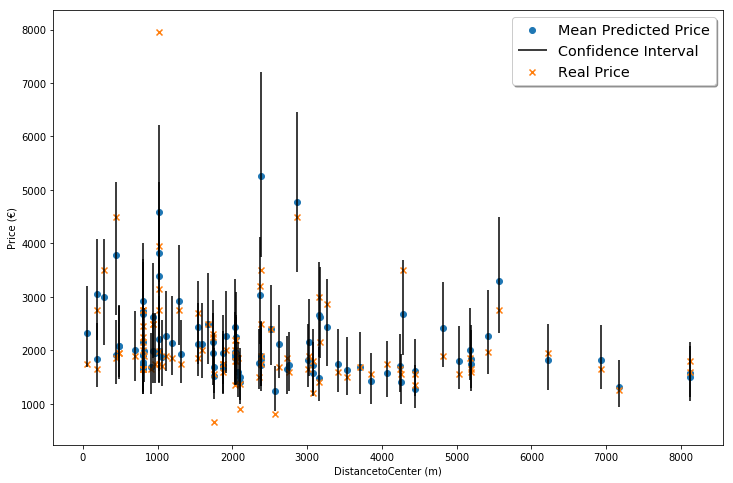

In [952]:
#https://docs.pymc.io/notebooks/posterior_predictive.html
_, ax = plt.subplots(figsize=(12, 8))

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

outcome = mpatches.Patch(color='orange',hatch='x', label='Outcome data')
#predict = mpatches.Circle(color='blue', label='The blue data')


blue_line = mlines.Line2D([], [], color='darkblue', marker='', label='Confidence Interval')

plt.legend(handles=[outcome,predict,blue_line])


β = PPC2nolog.T

# estimated probability #estimated
ax.scatter(x=datasave['DistancetoCenter'][dataindex], y=β[dataindex].mean(),label='Mean Predicted Price')

# error bars on the estimate #estimated error
plt.vlines(x=datasave['DistancetoCenter'][dataindex],  ymin=β[dataindex].quantile(0.025), ymax=β[dataindex].quantile(0.975),label='Confidence Interval')

# actual outcomes # X ile isaretlenmis price
ax.scatter(x=datasave['DistancetoCenter'][dataindex], y=datasave['Price (€)'][dataindex], marker='x',label='Real Price')

# True probabilities #fit curve here
#x = np.linspace(datasave['Surface (m²)'].min(), datasave['Surface (m²)'].max())
#ax.plot(x, invlogit(x), linestyle='-')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')



ax.set_xlabel('DistancetoCenter (m)')
ax.set_ylabel('Price (€)');

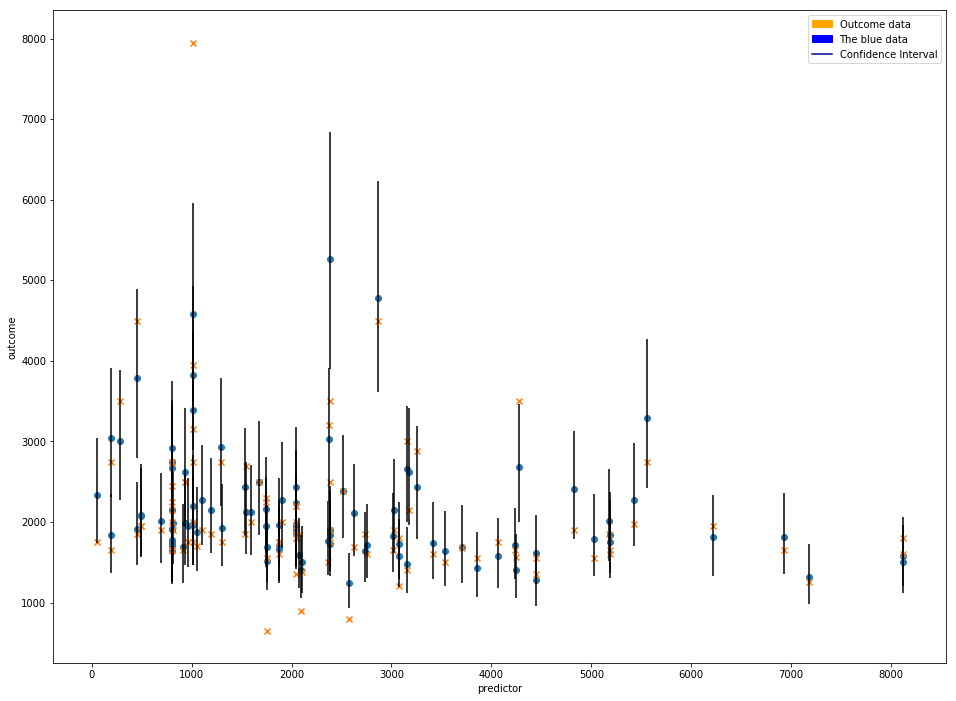

In [949]:
#https://docs.pymc.io/notebooks/posterior_predictive.html
_, ax = plt.subplots(figsize=(12, 8))

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

outcome = mpatches.Patch(color='orange',hatch='x', label='Outcome data')
#predict = mpatches.Circle(color='blue', label='The blue data')


blue_line = mlines.Line2D([], [], color='darkblue', marker='', label='Confidence Interval')

plt.legend(handles=[outcome,predict,blue_line])


β = PPC2nolog.T

# estimated probability #estimated
ax.scatter(x=datasave['Surface (m²)'][dataindex], y=β[dataindex].mean(),label='Mean Predicted Price')

# error bars on the estimate #estimated error
plt.vlines(x=datasave['Surface (m²)'][dataindex],  ymin=β[dataindex].quantile(0.025), ymax=β[dataindex].quantile(0.975),label='Confidence Interval')

# actual outcomes # X ile isaretlenmis price
ax.scatter(x=datasave['Surface (m²)'][dataindex], y=datasave['Price (€)'][dataindex], marker='x',label='Real Price')

# True probabilities #fit curve here
#x = np.linspace(datasave['Surface (m²)'].min(), datasave['Surface (m²)'].max())
#ax.plot(x, invlogit(x), linestyle='-')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')



ax.set_xlabel('Size (m²)')
ax.set_ylabel('Price (€)');

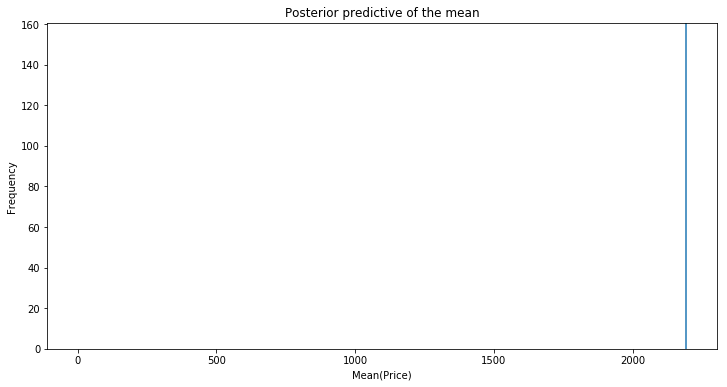

In [1005]:
_, ax = plt.subplots(figsize=(12, 6))
ax.hist([n.mean() for n in ppc['pricelike']], bins=19, alpha=0.5)
ax.axvline(data['Price (€)'].mean())
ax.set(title='Posterior predictive of the mean', xlabel='Mean(Price)', ylabel='Frequency');

In [284]:
len(ppc['pricelike'])

1000

In [ ]:
#correlation found between price and other 2 variable.
sns.set()
cols = ['Price (€)','Surface (m²)','Bedrooms','DistancetoCenter']#,'Price per number of bedrooms','Price per m²']
sns.pairplot(DATA[cols].dropna(), size = 3,dropna=True)
plt.show();

## Autocorrelation plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8B0DAD630>,
      dtype=object)

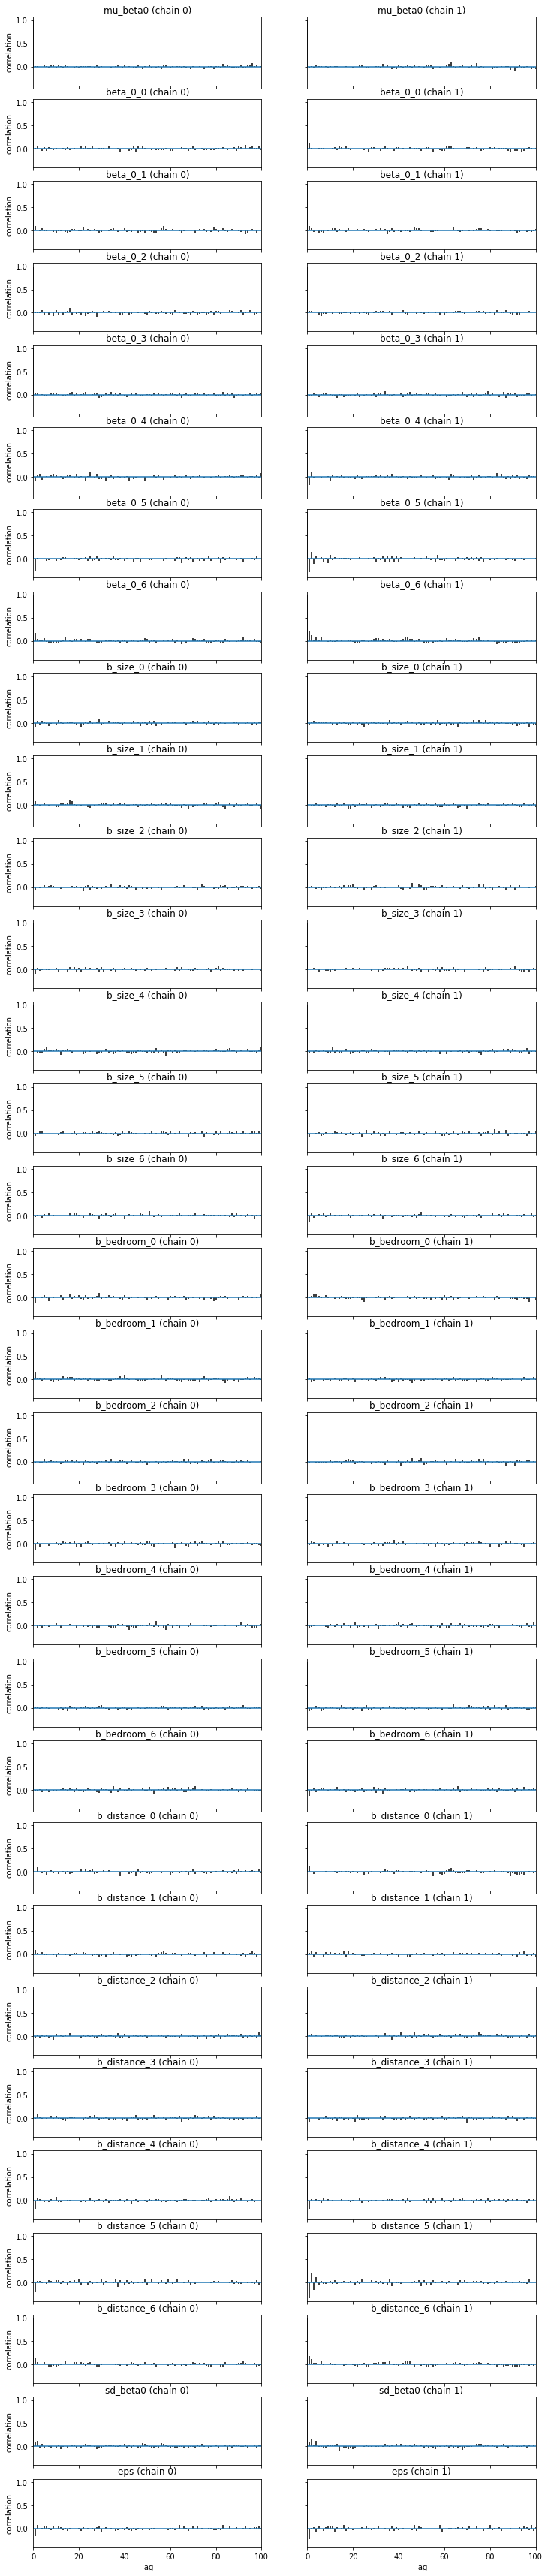

In [1179]:
pm.plots.autocorrplot(hierarchical_traceS)

# TSNE
#https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
 ###should visualize posterior distributions in  the space of parameters. Rows from model runs and columns as parameters of model
 
 #lets draw 30 point from each district

In [750]:
pm.summary(hierarchical_traceS).round(2).head()

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu_beta0,-0.09,0.11,0.0,-0.33,0.10,1692.86,1.0
beta_0__0,0.09,0.08,0.0,-0.05,0.25,2033.08,1.0
beta_0__1,-0.39,0.09,0.0,-0.56,-0.23,2006.90,1.0
beta_0__2,-0.26,0.12,0.0,-0.50,-0.03,1789.66,1.0
beta_0__3,-0.17,0.07,0.0,-0.30,-0.03,2332.43,1.0


In [751]:
# 7 district, remove 5
# 4 feature beta0, betasize, betabedroom, betadistance
# for each district take X=30 points
# input data, columns as 4 features
# order, 1till 7 district?
#features 30*4*7
#total size of output, (30*8,2)

In [749]:
help(trace)

Help on MultiTrace in module pymc3.backends.base object:

class MultiTrace(builtins.object)
 |  Main interface for accessing values from MCMC results
 |  
 |  The core method to select values is `get_values`. The method
 |  to select sampler statistics is `get_sampler_stats`. Both kinds of
 |  values can also be accessed by indexing the MultiTrace object.
 |  Indexing can behave in four ways:
 |  
 |  1. Indexing with a variable or variable name (str) returns all
 |     values for that variable, combining values for all chains.
 |  
 |     >>> trace[varname]
 |  
 |     Slicing after the variable name can be used to burn and thin
 |     the samples.
 |  
 |     >>> trace[varname, 1000:]
 |  
 |     For convenience during interactive use, values can also be
 |     accessed using the variable as an attribute.
 |  
 |     >>> trace.varname
 |  
 |  2. Indexing with an integer returns a dictionary with values for
 |     each variable at the given index (corresponding to a single
 |     sam

In [762]:
hierarchical_traceS

<MultiTrace: 2 chains, 1000 iterations, 9 variables>

In [759]:
hierarchical_traceS['beta_0', 100:]

array([[ 0.1397601 , -0.32400393, -0.37712759, ...,  0.03804376,
         0.09516097, -0.34196559],
       [ 0.05053307, -0.2769101 , -0.08943826, ..., -0.02467827,
         0.17047492,  0.07443891],
       [-0.03107393, -0.40693456, -0.26599071, ...,  0.07667438,
         0.09460106, -0.06949225],
       ...,
       [ 0.02435863, -0.25969763, -0.29663087, ...,  0.17141857,
         0.13332484,  0.5861566 ],
       [ 0.10940745, -0.45010683, -0.13544204, ...,  0.14808452,
         0.15042166, -0.10288325],
       [ 0.18295056, -0.38384235, -0.15194029, ...,  0.16657202,
         0.12911226, -0.31247823]])

In [775]:
hierarchical_traceS['beta_0'].shape

(2000, 8)

In [496]:
hierarchical_traceS['beta_0'].T[7].shape

(2000,)

In [763]:
hierarchical_traceS['beta_0'].T[0]

array([0.13060675, 0.08579481, 0.05319335, ..., 0.02435863, 0.10940745,
       0.18295056])

In [765]:
help(hierarchical_traceS)

Help on MultiTrace in module pymc3.backends.base object:

class MultiTrace(builtins.object)
 |  Main interface for accessing values from MCMC results
 |  
 |  The core method to select values is `get_values`. The method
 |  to select sampler statistics is `get_sampler_stats`. Both kinds of
 |  values can also be accessed by indexing the MultiTrace object.
 |  Indexing can behave in four ways:
 |  
 |  1. Indexing with a variable or variable name (str) returns all
 |     values for that variable, combining values for all chains.
 |  
 |     >>> trace[varname]
 |  
 |     Slicing after the variable name can be used to burn and thin
 |     the samples.
 |  
 |     >>> trace[varname, 1000:]
 |  
 |     For convenience during interactive use, values can also be
 |     accessed using the variable as an attribute.
 |  
 |     >>> trace.varname
 |  
 |  2. Indexing with an integer returns a dictionary with values for
 |     each variable at the given index (corresponding to a single
 |     sam

In [773]:
hierarchical_traceS[0]['b_bedroom']

array([0.2495627 , 0.12184283, 0.04748089, 0.31065313, 0.30099354,
       0.23173891, 0.08909551, 0.26240933])

In [770]:
hierarchical_traceS[1]

{'b_bedroom': array([ 0.23256407,  0.31862584, -0.17157547,  0.25895123,  0.33487021,
        -0.01473261,  0.13374461,  0.44801342]),
 'b_distance': array([-0.20221518, -0.2440666 , -0.63107888, -0.23176973, -0.42719474,
         3.77124758, -0.19567536, -0.26056567]),
 'b_size': array([0.69858074, 0.37026209, 0.85944689, 0.32842423, 0.47665048,
        0.97029835, 0.72811916, 0.43399518]),
 'beta_0': array([ 0.07658864, -0.47042654, -0.22214578, -0.08691655, -0.10120003,
        -0.23865918,  0.11314923, -0.40416191]),
 'eps': 0.4934209021982267,
 'eps_log__': -0.7063927121882729,
 'mu_beta0': -0.04629321078107798,
 'sd_beta0': 0.272367805256157,
 'sd_beta0_log__': -1.3006019009128325}

In [769]:
len(hierarchical_traceS)

1000

In [1096]:
import random
n=300   #max 1000
my_randoms = random.sample(range(1000),n)
districts=list(range(0,7))

In [935]:
hierarchical_traceS[60]['b_bedroom']

array([ 0.23898617,  0.1753646 , -0.03931697,  0.08503361,  0.23150613,
       -0.19584436,  0.07768497,  0.16515311])

In [936]:
Tdata=pd.DataFrame({'col1':[],'col2':[],'col3':[],'col4':[],'col5':[],'col6':[],'col7':[],'col8':[],'col9':[],})
Tdata.shape
len(Tdata)
Tdata

,col1,col2,col3,col4,col5,col6,col7,col8,col9


In [1211]:
Tdata=pd.DataFrame({'b_bedroom':[],'b_distance':[],'b_size':[],'beta_0':[],'mu_beta0':[],'sd_beta0':[]})
for i in districts:
    for j in my_randoms:
        a1=hierarchical_traceb0[j]['b_bedroom']
        a2=hierarchical_traceb0[j]['b_distance']
        a3=hierarchical_traceb0[j]['b_size']
        a4=hierarchical_traceb0[j]['beta_0'][i]
        #a5=hierarchical_traceb0[j]['error']
        #a6=hierarchical_traceb0[j]['error_log__']
        a7=hierarchical_traceb0[j]['mu_beta0']
        a8=hierarchical_traceb0[j][ 'sd_beta0']
        #a9=hierarchical_traceb0[j]['sd_beta0_log__']
        
        Tdata.loc[len(Tdata)]=[a1,a2,a3,a4,a7,a8]

        
Tdata.head()

,b_bedroom,b_distance,b_size,beta_0,mu_beta0,sd_beta0
0,0.162240,-0.271593,0.653565,0.034651,-0.132510,0.184235
1,0.180103,-0.247968,0.652897,0.038541,-0.175614,0.366075
2,0.193971,-0.290903,0.664039,-0.015506,0.108772,0.241097
3,0.180718,-0.254770,0.666271,0.026689,-0.297169,0.468137
4,0.168682,-0.223905,0.669639,0.035842,-0.264359,0.427215


In [1212]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(Tdata.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2100 samples in 0.002s...
[t-SNE] Computed neighbors for 2100 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2100
[t-SNE] Computed conditional probabilities for sample 2000 / 2100
[t-SNE] Computed conditional probabilities for sample 2100 / 2100
[t-SNE] Mean sigma: 0.046955
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.944489
[t-SNE] Error after 600 iterations: 0.942267


In [1213]:
tsne_results[:].shape

(2100, 2)

In [1214]:
type(tsne_results)

numpy.ndarray

In [1215]:
#TSNEdata
print(len(crlist),len(tsne_results))

2100 2100


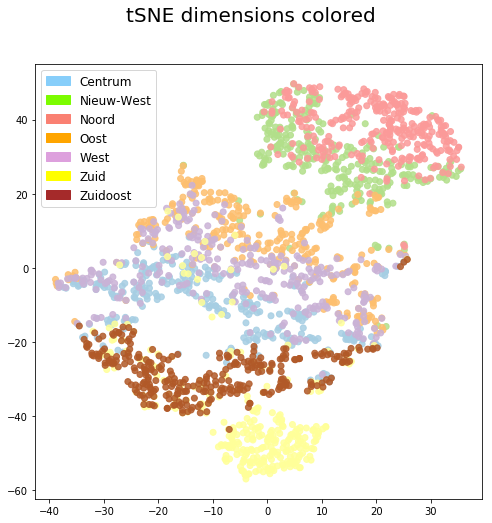

In [1216]:
import matplotlib.pyplot as plt
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1)
fig.suptitle('tSNE dimensions colored', fontsize=20)
crlist=[0]*n+[1]*n+[2]*n+[3]*n+[4]*n+[5]*n+[6]*n
# Create the scatter
patch0 = mpatches.Patch(color='lightskyblue', label='Centrum')
patch1 = mpatches.Patch(color='lawngreen', label='Nieuw-West')
patch2 = mpatches.Patch(color='salmon', label='Noord')
patch3 = mpatches.Patch(color='orange', label='Oost')
patch4 = mpatches.Patch(color='plum', label='West')
#patch4 = mpatches.Patch(color='mediumpurple', label='Westpoort')
patch5 = mpatches.Patch(color='yellow', label='Zuid')
patch6 = mpatches.Patch(color='brown', label='Zuidoost')


ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=crlist, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85)
#legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

#ax.legend(cizim,crlist)
plt.legend(handles=[patch0,patch1,patch2,patch3,patch4,patch5,patch6],fontsize = 'large')



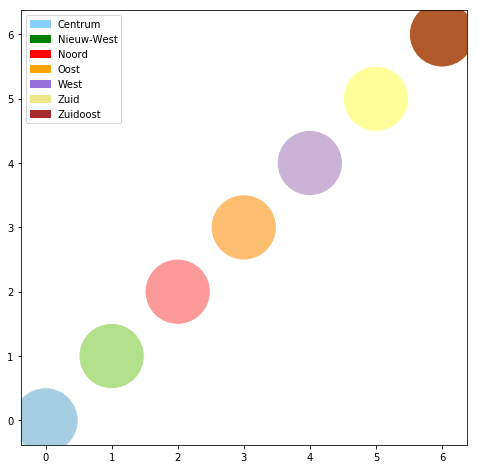

In [1178]:
import matplotlib.pyplot as plt
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1)
crlist=list(range(0,7))
# Create the scatte

ax.scatter(
    x=list(range(0,7) ),
    y=list(range(0,7)),
    c=crlist, 
    cmap=plt.cm.get_cmap('Paired'),
    s=4000,
    alpha=1)
#legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.legend(handles=[patch0,patch1,patch2,patch3,patch4,patch5,patch6])

#ax.legend(cizim,crlist)


# tsne for second trace results


In [1093]:
hierarchical_traceS[0]

{'b_bedroom': array([0.21160675, 0.32127235, 0.03206007, 0.24478665, 0.24144992,
        0.06646492, 0.55712362]),
 'b_distance': array([-0.05555224, -0.29001717, -0.43204395, -0.2434199 , -0.45261992,
        -0.22939826, -0.48546384]),
 'b_size': array([0.67665019, 0.3710877 , 0.64370183, 0.34159126, 0.62370454,
        0.80105952, 0.52292531]),
 'beta_0': array([ 0.20550889, -0.40347698, -0.24174759, -0.1436801 , -0.02403566,
         0.19783535,  0.38592392]),
 'eps': 0.49936991663228103,
 'eps_log__': -0.6944081419731717,
 'mu_beta0': 0.24334689791053862,
 'sd_beta0': 0.36134285970609276,
 'sd_beta0_log__': -1.0179280214979358}

In [1217]:
Tdata2=pd.DataFrame({'b_bedroom':[],'b_distance':[],'b_size':[],'b_0':[]})
for i in districts:
    for j in my_randoms:
        a1=hierarchical_traceS[j]['b_bedroom'][i]
        a2=hierarchical_traceS[j]['b_distance'][i]
        a3=hierarchical_traceS[j]['b_size'][i]
        a4=hierarchical_traceS[j]['beta_0'][i]
        #a5=hierarchical_traceS[j]['eps']
        #a6=hierarchical_traceS[j]['eps_log__']
        #a7=hierarchical_traceS[j]['mu_beta0']
        #a8=hierarchical_traceS[j][ 'sd_beta0']
        #a9=hierarchical_traceS[j]['sd_beta0_log__']
        
        Tdata2.loc[len(Tdata2)]=[a1,a2,a3,a4]#,a5,a6,a7,a8,a9,a10]

        
Tdata2.head()

,b_0,b_bedroom,b_distance,b_size
0,0.220711,-0.153195,0.673012,0.107190
1,0.221939,-0.199230,0.693778,0.091458
2,0.184294,-0.106307,0.725559,0.188337
3,0.230251,-0.141636,0.690876,0.133265
4,0.124962,-0.207000,0.755875,0.071771


In [1218]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results2 = tsne.fit_transform(Tdata2.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2100 samples in 0.004s...
[t-SNE] Computed neighbors for 2100 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2100
[t-SNE] Computed conditional probabilities for sample 2000 / 2100
[t-SNE] Computed conditional probabilities for sample 2100 / 2100
[t-SNE] Mean sigma: 0.041007
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.594738
[t-SNE] Error after 600 iterations: 0.743035


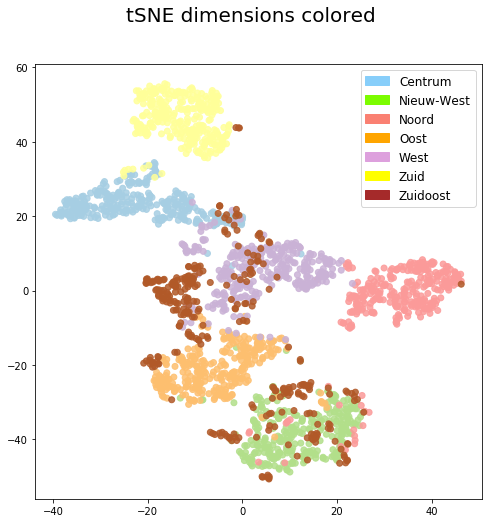

In [1219]:
import matplotlib.pyplot as plt
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1)
fig.suptitle('tSNE dimensions colored', fontsize=20)
crlist=[0]*n+[1]*n+[2]*n+[3]*n+[4]*n+[5]*n+[6]*n
# Create the scatter
patch0 = mpatches.Patch(color='lightskyblue', label='Centrum')
patch1 = mpatches.Patch(color='lawngreen', label='Nieuw-West')
patch2 = mpatches.Patch(color='salmon', label='Noord')
patch3 = mpatches.Patch(color='orange', label='Oost')
patch4 = mpatches.Patch(color='plum', label='West')
#patch4 = mpatches.Patch(color='mediumpurple', label='Westpoort')
patch5 = mpatches.Patch(color='yellow', label='Zuid')
patch6 = mpatches.Patch(color='brown', label='Zuidoost')

ax.scatter(
    x=tsne_results2[:,0], 
    y=tsne_results2[:,1], 
    c=crlist, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85)
#legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

#ax.legend(cizim,crlist)
plt.legend(handles=[patch0,patch1,patch2,patch3,patch4,patch5,patch6],fontsize = 'large')



In [ ]:
import matplotlib.pyplot as plt
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1)
fig.suptitle('tSNE dimensions colored', fontsize=20)
crlist=[0]*n+[1]*n+[2]*n+[3]*n+[4]*n+[5]*n+[6]*n
# Create the scatter
patch0 = mpatches.Patch(color='lightskyblue', label='Centrum')
patch1 = mpatches.Patch(color='lawngreen', label='Nieuw-West')
patch2 = mpatches.Patch(color='salmon', label='Noord')
patch3 = mpatches.Patch(color='orange', label='Oost')
patch4 = mpatches.Patch(color='plum', label='West')
#patch4 = mpatches.Patch(color='mediumpurple', label='Westpoort')
patch5 = mpatches.Patch(color='yellow', label='Zuid')
patch6 = mpatches.Patch(color='brown', label='Zuidoost')

ax.scatter(
    x=tsne_results2[:,0], 
    y=tsne_results2[:,1], 
    c=crlist, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85)
#legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

#ax.legend(cizim,crlist)
plt.legend(handles=[patch0,patch1,patch2,patch3,patch4,patch5,patch6],fontsize = 'large')



In [1208]:
Tdatanew=pd.DataFrame({'b_bedroom':[],'b_distance':[],'b_size':[],'beta_0':[]})
for i in districts:
    for j in my_randoms:
        a1=hierarchical_traceS[j]['b_bedroom'][i]
        a2=hierarchical_traceS[j]['b_distance'][i]
        a3=hierarchical_traceS[j]['b_size'][i]
        a4=hierarchical_traceS[j]['beta_0'][i]
        
        Tdatanew.loc[len(Tdatanew)]=[a1,a2,a3,a4]

        
Tdatanew.head()

,b_bedroom,b_distance,b_size,beta_0
0,0.220711,-0.153195,0.673012,0.107190
1,0.221939,-0.199230,0.693778,0.091458
2,0.184294,-0.106307,0.725559,0.188337
3,0.230251,-0.141636,0.690876,0.133265
4,0.124962,-0.207000,0.755875,0.071771


In [1209]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results3 = tsne.fit_transform(Tdatanew.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2100 samples in 0.003s...
[t-SNE] Computed neighbors for 2100 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2100
[t-SNE] Computed conditional probabilities for sample 2000 / 2100
[t-SNE] Computed conditional probabilities for sample 2100 / 2100
[t-SNE] Mean sigma: 0.041007
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.585964
[t-SNE] Error after 600 iterations: 0.742958


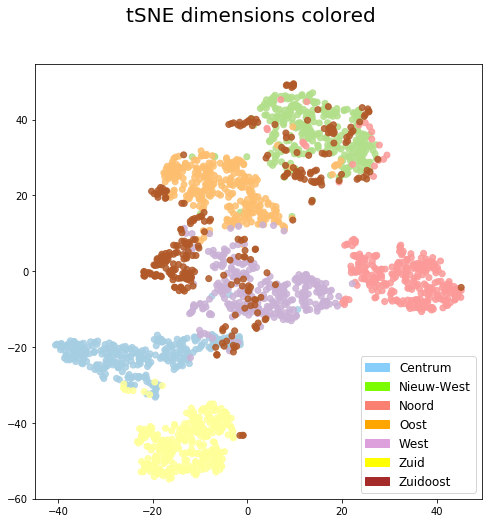

In [1210]:
import matplotlib.pyplot as plt
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1)
fig.suptitle('tSNE dimensions colored', fontsize=20)
crlist=[0]*n+[1]*n+[2]*n+[3]*n+[4]*n+[5]*n+[6]*n
# Create the scatter
patch0 = mpatches.Patch(color='lightskyblue', label='Centrum')
patch1 = mpatches.Patch(color='lawngreen', label='Nieuw-West')
patch2 = mpatches.Patch(color='salmon', label='Noord')
patch3 = mpatches.Patch(color='orange', label='Oost')
patch4 = mpatches.Patch(color='plum', label='West')
#patch4 = mpatches.Patch(color='mediumpurple', label='Westpoort')
patch5 = mpatches.Patch(color='yellow', label='Zuid')
patch6 = mpatches.Patch(color='brown', label='Zuidoost')



ax.scatter(
    x=tsne_results3[:,0], 
    y=tsne_results3[:,1], 
    c=crlist, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85)
#legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

#ax.legend(cizim,crlist)
plt.legend(handles=[patch0,patch1,patch2,patch3,patch4,patch5,patch6],fontsize = 'large')



# ppc for second model

In [1107]:
ppc2second = pm.sample_ppc(hierarchical_traceS, model= hierarchical_model, samples=1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.94it/s]


In [1108]:
ppc2second['pricelike'].shape

(1000, 1475)

In [1115]:
PPCsecond=pd.DataFrame(ppc2second['pricelike'].T)
type(PPCsecond)
PPCsecond.shape
PPCsecond.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.682993,0.922244,0.905777,0.178114,0.954973,1.452789,1.136091,0.657546,-0.157603,0.878399,...,0.862713,1.544346,1.747423,0.572706,1.008336,0.922138,0.814971,1.470526,1.183998,1.901907
1,-2.059866,-1.880241,-1.410417,-1.604613,-0.263560,-0.406675,-1.473491,-1.223823,-1.353853,-1.841023,...,-1.550276,-1.117270,-1.726429,-2.253066,-1.194113,-1.378068,-1.503537,-1.608476,-1.999124,-1.869743
2,-0.368789,-0.629167,-1.223859,-0.913352,-0.984229,-0.695992,-0.132946,-0.223072,-0.193814,-0.780536,...,-0.821680,-0.062698,-0.240199,-0.172896,-0.354228,-0.591512,-1.286253,-0.297747,-0.887758,0.230083
3,-0.471864,-0.876028,-0.333874,0.367267,-0.052405,0.308987,-0.339188,-1.818367,-0.497953,-0.374949,...,-1.061181,-0.797823,-1.552027,0.242837,-1.453987,-0.315271,-0.987117,-1.030909,-0.647876,-0.046260
4,-0.702237,0.438237,-0.179549,0.002093,0.939041,0.252899,-0.416455,0.495592,-0.417934,-0.908008,...,-0.203101,-0.152545,-0.152892,0.372852,0.558993,-0.786016,-0.673604,-0.228666,0.051514,0.028652


In [1114]:
PPCsecondnolog=pd.DataFrame().astype(float)
PPCsecondnolog=PPCsecond.apply(lambda x:np.exp((x*logdev)+logmean))
PPCsecondnolog.shape

(1475, 1000)

In [1146]:
PPCsecondnolog.reset_index(level=0, inplace=True)
PPCsecondnolog.head()

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,2590.541136,2807.435361,2791.941700,2186.261815,2838.485582,3355.398431,3016.624592,2568.481313,1953.005589,...,2751.826636,3460.246805,3704.645983,2496.283453,2889.848397,2807.335544,2708.026936,3375.459347,3065.585287,3902.060632
1,1,1030.536730,1094.662376,1281.894238,1200.905178,1884.684652,1796.183548,1255.007441,1364.853483,1306.495007,...,1223.036137,1414.613214,1152.734746,965.751544,1378.549280,1295.905927,1242.398818,1199.347297,1051.789673,1098.531281
2,2,1819.199474,1666.777054,1364.836695,1514.956112,1479.296732,1629.761963,1969.256070,1910.504838,1929.382403,...,1562.355027,2016.299350,1899.539731,1942.993944,1828.123679,1688.003313,1336.516147,1863.155540,1528.042614,2224.780858
3,3,1757.261191,1534.078098,1840.671269,2329.750868,2023.286301,2284.564153,1837.387348,1117.662682,1741.921029,...,1441.530891,1574.931578,1222.316814,2234.336675,1263.260475,1852.215084,1477.861672,1456.271071,1656.330077,2027.469306
4,4,1626.345226,2385.985346,1938.654004,2060.684384,2823.328344,2241.905195,1790.290004,2432.421374,1789.399939,...,1923.370464,1956.327780,1956.100125,2334.128121,2484.805842,1581.193437,1642.070808,1906.916007,2095.195285,2079.159611


In [1156]:
datasave.reset_index(level=0, inplace=True)
datasave.shape

(1475, 8)

In [1157]:
datasamp=pd.concat([PPCsecondnolog, datasave], axis=1)
datasamp.shape

(1475, 1009)

In [1158]:
sampdata=datasamp.sample(100)
dataindex=sampdata.index
dataindex

Int64Index([ 348,  690,  574,  975,  980, 1195,   72, 1034,  456,  600, 1396,
            1385, 1435,  629, 1471,  428,  654,   36,  635,  903,  159, 1297,
            1381, 1210,  976, 1137,  142,  264, 1110, 1098, 1357,  844,  359,
             342, 1146, 1337,  110,  279,  436,  626,  619,  265, 1106,  439,
             235,  215,  628, 1374, 1462, 1190,  413, 1283,  818,  941,  470,
            1448,  881, 1288, 1404, 1225,  727, 1323,  402,  489,   59, 1045,
            1390,    0,  765,  203,  379,  546,  738, 1155,  921,  669, 1065,
             762,  766,  483, 1164, 1113,  538, 1052,  488,  218,  194,  579,
            1271,  374,  556,  804,  337,  735,  557,  181, 1332,  438, 1145,
             137],
           dtype='int64')

In [1192]:
datasave.head()

,index,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms
0,0,2995.0,Stadsdeel Zuid,BU03634801,3424.008737,Marathonbuurt Oost,140.0,3
1,1,900.0,Stadsdeel Zuid,BU03634903,3022.583084,Minervabuurt Noord,18.0,1
2,2,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2
3,3,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2
4,4,2200.0,Stadsdeel Zuid,BU03635203,3478.607035,Scheldebuurt Oost,85.0,2


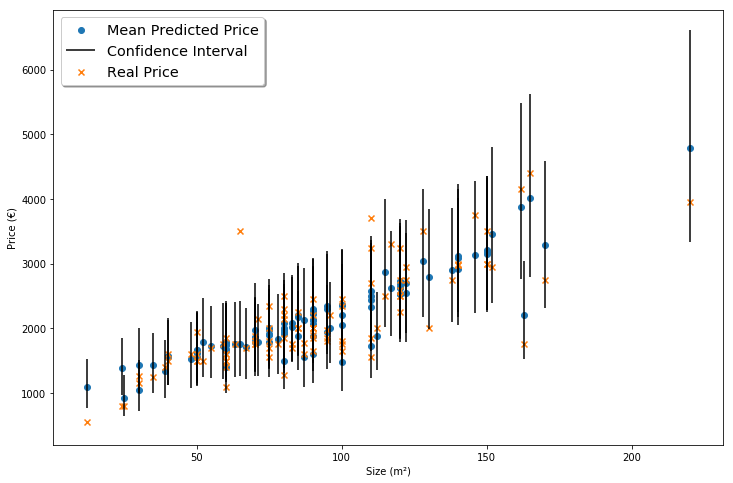

In [1162]:
#https://docs.pymc.io/notebooks/posterior_predictive.html
_, ax = plt.subplots(figsize=(12, 8))

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

outcome = mpatches.Patch(color='orange',hatch='x', label='Outcome data')
#predict = mpatches.Circle(color='blue', label='The blue data')


blue_line = mlines.Line2D([], [], color='darkblue', marker='', label='Confidence Interval')

plt.legend(handles=[outcome,predict,blue_line])


β = PPCsecondnolog.T

# estimated probability #estimated
ax.scatter(x=datasave['Surface (m²)'][dataindex], y=β[dataindex].mean(),label='Mean Predicted Price')

# error bars on the estimate #estimated error
plt.vlines(x=datasave['Surface (m²)'][dataindex],  ymin=β[dataindex].quantile(0.025), ymax=β[dataindex].quantile(0.975),label='Confidence Interval')

# actual outcomes # X ile isaretlenmis price
ax.scatter(x=datasave['Surface (m²)'][dataindex], y=datasave['Price (€)'][dataindex], marker='x',label='Real Price')

# True probabilities #fit curve here
#x = np.linspace(datasave['Surface (m²)'].min(), datasave['Surface (m²)'].max())
#ax.plot(x, invlogit(x), linestyle='-')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')



ax.set_xlabel('Size (m²)')
ax.set_ylabel('Price (€)');

# computations before discussion plots

In [1227]:
datasave.columns

Index(['index', 'Price (€)', 'Area', 'encryption', 'DistancetoCenter',
       'region indication', 'Surface (m²)', 'Bedrooms'],
      dtype='object')

In [1277]:
datasave.head()

,index,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Log_Price
0,0,0.858717,Stadsdeel Zuid,BU03634801,0.531435,Marathonbuurt Oost,1.145056,1.147001,1.114684
1,1,-1.387257,Stadsdeel Zuid,BU03634903,0.321492,Minervabuurt Noord,-1.800323,-1.007619,-2.462880
2,2,-0.315193,Stadsdeel Nieuw-West,BU03638701,0.693331,Andreasterrein,-0.182779,0.069691,-0.239478
3,3,-0.315193,Stadsdeel Nieuw-West,BU03638701,0.693331,Andreasterrein,-0.182779,0.069691,-0.239478
4,4,0.006426,Stadsdeel Zuid,BU03635203,0.559990,Scheldebuurt Oost,-0.182779,0.069691,0.196754


In [1232]:
distmean=datasave.DistancetoCenter.mean()
bedroomeman=datasave.Bedrooms.mean()
surfacemean=datasave['Surface (m²)'].mean()


In [1266]:
bedroomcoef=hierarchical_traceb0['b_bedroom'].mean()
distcoef=hierarchical_traceb0['b_distance'].mean()
surfcoef=hierarchical_traceb0['b_size'].mean()

In [1238]:
hierarchical_traceb0['error'].mean()


0.49618643505327253

In [ ]:
Pricedeviation= 932.780395
Distancedeviation= 1912.066184
Bedroomdeviation=0.928238
Surfacedeviation=41.420824
logdev=0.336068

pricemean=2194.006065
distancemean= 2407.869531
bedroommean=1.935310
surfacemean=92.794474
logmean=7.630090


In [1268]:
constantA=bedroomcoef*bedroomeman+distcoef*distmean+surfacemean*surfcoef
constantA
print(constantA,bedroomcoef,distcoef,surfcoef)

-572.6184624230359 0.16486855947063161 -0.26422672057173735 0.6800628277129083


In [1323]:
dist0=0
dist1=0
dist2=0
dist3=0
dist4=0
dist5=0
dist6=0
dist7=0
for j in range(1000):
    dist0=+hierarchical_traceb0[j]['beta_0'][0]
    dist1=+hierarchical_traceb0[j]['beta_0'][1]
    dist2=+hierarchical_traceb0[j]['beta_0'][2]
    dist3=+hierarchical_traceb0[j]['beta_0'][3]
    dist4=+hierarchical_traceb0[j]['beta_0'][4]
    dist5=+hierarchical_traceb0[j]['beta_0'][5]
    dist6=+hierarchical_traceb0[j]['beta_0'][6]
    dist7=+hierarchical_traceb0[j]['beta_0'][7]


b00=dist0/1000
b01=dist1/1000
b02=dist2/1000
b03=dist3/1000
b04=dist4/1000
b05=dist5/1000
b06=dist6/1000
b07=dist7/1000

In [1333]:
b0mat=[b00,b01,b02,b03,b04,b05,b06,b07]
b0mat

[1.8577537308641775e-05,
 -0.0002943317498869504,
 -0.0005413700927959789,
 -8.83228249217434e-05,
 -3.218506698339514e-05,
 0.00027909530964248834,
 0.00013004385996465435,
 -0.0004614139865090934]

In [1328]:
data[data.Area_idx==0].DistancetoCenter.mean()

-0.8024232064803927

In [1329]:
JJ=[]
for i in range(0,8):
    JJ.append(data[data.Area_idx==i].DistancetoCenter.mean())    

In [1382]:

my_new_list = [i * hierarchical_traceb0['b_distance'].mean() for i in JJ]

print(my_new_list)

[0.21202165235897222, -0.3479862460600212, -0.2086101797075017, -0.30561165456870526, 0.05440226178331346, nan, -0.06333422052639859, -0.8409848635244555]


In [1383]:
prices=[(math.exp(sum(x))) for x in zip(b0mat, my_new_list)]

print(prices)

[(x*Pricedeviation+pricemean) for x in prices]

[1.2361976161800399, 0.7059007883289496, 0.8112722781748124, 0.7366075852346745, 1.0558752847175836, nan, 0.9387517829107634, 0.4310866014986815]


[3347.106965718476,
 2852.456481168289,
 2950.7449410884515,
 2881.099179315196,
 3178.905830149605,
 nan,
 3069.6553238704564,
 2596.1151954251477]

In [1401]:
math.exp(0.5*logdev+logmean)

2436.0277003281285

In [1385]:
logprices=[(sum(x)*logdev)+logmean for x in zip(b0mat, my_new_list)]
prices2=[math.exp(x) for x in logprices]
prices2


[2211.3311333715383,
 1831.781084578593,
 1919.463227571027,
 1858.1822798991925,
 2097.207638527034,
 nan,
 2015.956595109913,
 1552.011068385536]

In [1340]:
my_new2_list = [i /bedroommean for i in prices]
my_new3_list = [i /surfacemean for i in prices]

my_new2_list

[1729.4939651624163,
 1473.9015874295533,
 1524.6885207478138,
 1488.7016443439015,
 1642.5822375483024,
 nan,
 1586.131071440987,
 1341.4466909307282]

In [1345]:
datasave

,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Area_idx,Log_Price
0,2995.0,Stadsdeel Zuid,BU03634801,3424.008737,Marathonbuurt Oost,140.0,3,6,8.004700
1,900.0,Stadsdeel Zuid,BU03634903,3022.583084,Minervabuurt Noord,18.0,1,6,6.802395
2,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1,7.549609
3,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1,7.549609
4,2200.0,Stadsdeel Zuid,BU03635203,3478.607035,Scheldebuurt Oost,85.0,2,6,7.696213
5,1800.0,Stadsdeel Zuid,BU03632304,4506.270731,Vivaldi,63.0,1,6,7.495542
6,1500.0,Stadsdeel Zuid,BU03632602,2752.456615,Burgemeester Tellegenbuurt West,75.0,1,6,7.313220
7,1350.0,Stadsdeel West,BU03633704,2570.560615,Erasmusparkbuurt Oost,48.0,1,4,7.207860
8,2100.0,Stadsdeel Zuid,BU03635202,3410.689765,Scheldebuurt Midden,95.0,2,6,7.649693
9,7950.0,Stadsdeel Centrum,BU03630303,1017.846536,Amstelveldbuurt,208.0,3,0,8.980927


In [1351]:
datasave[((datasave['Bedrooms']==2) & (datasave['Area_idx']==7) )]

,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Area_idx,Log_Price
26,1250.0,Stadsdeel Zuidoost,BU03639409,8443.873581,G-buurt Oost,67.0,2,7,7.130899
169,1550.0,Stadsdeel Zuidoost,BU03639405,9352.072984,K-buurt Midden,75.0,2,7,7.346010
533,1500.0,Stadsdeel Zuidoost,BU03639409,8443.873581,G-buurt Oost,69.0,2,7,7.313220
951,1450.0,Stadsdeel Zuidoost,BU03639500,10384.690352,L-buurt,82.0,2,7,7.279319
999,1500.0,Stadsdeel Zuidoost,BU03639409,8443.873581,G-buurt Oost,60.0,2,7,7.313220
1020,1250.0,Stadsdeel Zuidoost,BU03639301,7177.232030,Venserpolder Oost,71.0,2,7,7.130899
1498,1495.0,Stadsdeel Zuidoost,BU03639400,7810.391543,E-buurt,75.0,2,7,7.309881


In [1359]:
suedaaa=datasave[((datasave['Bedrooms']==2) & (datasave['Surface (m²)']<100) & (datasave['Surface (m²)']>81))]



In [1363]:
suedaaa

,Price (€),Area,encryption,DistancetoCenter,region indication,Surface (m²),Bedrooms,Area_idx,Log_Price
2,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1,7.549609
3,1900.0,Stadsdeel Nieuw-West,BU03638701,3733.564445,Andreasterrein,85.0,2,1,7.549609
4,2200.0,Stadsdeel Zuid,BU03635203,3478.607035,Scheldebuurt Oost,85.0,2,6,7.696213
8,2100.0,Stadsdeel Zuid,BU03635202,3410.689765,Scheldebuurt Midden,95.0,2,6,7.649693
16,1700.0,Stadsdeel West,BU03631501,2106.386305,Markthallen,85.0,2,4,7.438384
31,1595.0,Stadsdeel Oost,BU03632802,2655.841772,Oosterparkbuurt Zuidoost,95.0,2,3,7.374629
41,1790.0,Stadsdeel Zuid,BU03639003,6219.330971,Buitenveldert Zuidwest,88.0,2,6,7.489971
44,2500.0,Stadsdeel Zuid,BU03632602,2752.456615,Burgemeester Tellegenbuurt West,95.0,2,6,7.824046
46,1599.0,Stadsdeel Nieuw-West,BU03638805,5942.159930,Nieuw Sloten Noordoost,85.0,2,1,7.377134
57,1750.0,Stadsdeel Oost,BU03633505,7584.163563,Haveneiland Noordoost,87.0,2,3,7.467371


In [1372]:
suedaaa[suedaaa['Area_idx']==7]['Price (€)'].describe()

count       1.0
mean     1450.0
std         NaN
min      1450.0
25%      1450.0
50%      1450.0
75%      1450.0
max      1450.0
Name: Price (€), dtype: float64

In [1341]:
my_new3_list

[36.0701108744738,
 30.739508057002286,
 31.7987140170486,
 31.04817620190612,
 34.25749070089675,
 nan,
 33.08015220680551,
 27.97704522173538]

In [1315]:
hierarchical_traceb0[900]['beta_0'][2]

-0.4486222754255642

In [1260]:
def calculateprice(districtb0):
    Pricedeviation= 932.780395
    Distancedeviation= 1912.066184
    Bedroomdeviation=0.928238
    Surfacedeviation=41.420824
    logdev=0.336068

    pricemean=2194.006065
    distancemean= 2407.869531
    bedroommean=1.935310
    surfacemean=92.794474
    logmean=7.630090




# Plot on amsterdam map

In [1220]:
#import shape files for plotting
from dbfread import DBF
import shapefile
import matplotlib.patches as mpatches
#import tilemapbase

myshp = open("C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Shapefiles/buurt_2017/buurt_2017.shp", "rb")
mydbf = open("C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Shapefiles/buurt_2017/buurt_2017.dbf", "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf)

In [1221]:
records= r.records()
shapes = r.shapes()
print(len(shapes),len(records))

13308 13308


In [1396]:
X=data.reset_index(level=0)['Area_idx']

dataindex=data.reset_index(level=0).encryption.tolist()

In [1397]:
dataindex

['BU03634801',
 'BU03634903',
 'BU03638701',
 'BU03638701',
 'BU03635203',
 'BU03632304',
 'BU03632602',
 'BU03633704',
 'BU03635202',
 'BU03630303',
 'BU03630401',
 'BU03632803',
 'BU03631700',
 'BU03630610',
 'BU03630303',
 'BU03632001',
 'BU03631501',
 'BU03632801',
 'BU03630607',
 'BU03633704',
 'BU03633307',
 'BU03639997',
 'BU03635300',
 'BU03630407',
 'BU03630804',
 'BU03630606',
 'BU03639409',
 'BU03632900',
 'BU03631700',
 'BU03638700',
 'BU03630001',
 'BU03632802',
 'BU03630303',
 'BU03630606',
 'BU03630105',
 'BU03630105',
 'BU03630804',
 'BU03634705',
 'BU03630404',
 'BU03639000',
 'BU03639003',
 'BU03634602',
 'BU03634705',
 'BU03632602',
 'BU03634500',
 'BU03638805',
 'BU03630703',
 'BU03639501',
 'BU03632404',
 'BU03632200',
 'BU03630200',
 'BU03634500',
 'BU03632100',
 'BU03630202',
 'BU03632100',
 'BU03633505',
 'BU03632401',
 'BU03632400',
 'BU03630704',
 'BU03630704',
 'BU03630201',
 'BU03630106',
 'BU03630404',
 'BU03639501',
 'BU03632401',
 'BU03631601',
 'BU036316

<Figure size 1440x1440 with 0 Axes>

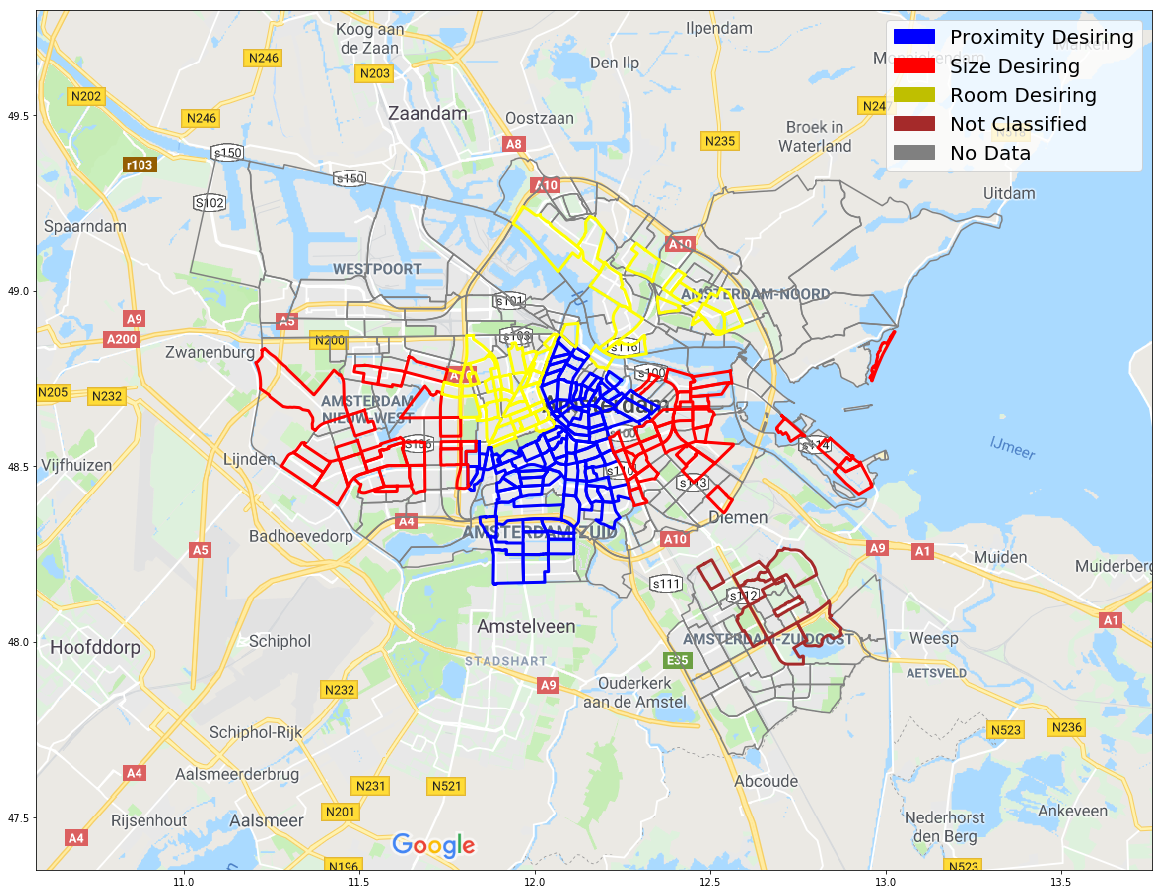

In [1399]:
#absolute price graph

import imageio
im = imageio.imread('amsterdambigger.png')
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.imshow(im,extent=[10.58, 13.76, 47.35, 49.8])#,aspect='auto')

blue_patch = mpatches.Patch(color='blue', label='Proximity Desiring')
red_patch = mpatches.Patch(color='red', label='Size Desiring')
yellow_patch = mpatches.Patch(color='y', label='Room Desiring')
brown_patch = mpatches.Patch(color='brown', label='Not Classified')
gray_patch=mpatches.Patch(color='gray', label='No Data')

plt.legend(handles=[blue_patch,red_patch,yellow_patch,brown_patch,gray_patch],prop={'size': 20})

#####

num=0
records=r.records()
#shapes = r.shapes()
#print(len(shapes),len(records))

for i in range(len(shapes)):
    if  ((records[i][4]=='Amsterdam')): #and (records[i][0]in dataindex)):    
        shape=r.shape(i)
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts
        if (records[i][0]in dataindex):
            xi=dataindex.index(records[i][0])

            num=num+1
            if num>500:  #if something wrong or too long...
                break

            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ip in range(len(shape.points)):
                    x_lon[ip] = shape.points[ip][0]
                    y_lat[ip] = shape.points[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'blue', linewidth=3)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'red', linewidth=3)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'red', linewidth=3)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'gray', linewidth=3)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'blue',linewidth=3)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'brown', linewidth=3)


            else: # loop over parts of each shape, plot separately
                for ip in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ip]
                    if ip < nparts-1:
                        i1 = shape.parts[ip+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ip in range(len(seg)):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'blue', linewidth=3)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'red', linewidth=3)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'red', linewidth=3)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'gray', linewidth=3)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'blue', linewidth=3)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'brown', linewidth=3)
            
        else:
            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ij in range(len(shape.points)):
                    x_lon[ij] = shape.points[ij][0]
                    y_lat[ij] = shape.points[ij][1]

                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
                    
            else: # loop over parts of each shape, plot separately
                for ij in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ij]
                    if ij < nparts-1:
                        i1 = shape.parts[ij+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ij in range(len(seg)):
                    x_lon[ij] = seg[ij][0]
                    y_lat[ij] = seg[ij][1]
                    
                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
#plt.imshow(im,zorder=0.1)

#for i in range(len(RentalData['newLat'])):
#    plt.plot(DATA['newLon'][i]/10000,DATA['newLat'][i]/10000, 'ro')
        
        

#plt.xlim(-130,-60)
#plt.ylim(23,50)
plt.gcf().set_size_inches(20, 20)
plt.show()